TMA4320, spring 2022: Industrial mathematics project

Group: 1881

# Dimensionality reduction and noise removal of face images with Non-Negative Matrix Factorization

Non-negative matrix factorization (NMF) is designed to extract alternative structures inherent in a given dataset. The method has a vast variety of applications, a few of which will be examined in this project. Digital images can be represented as matrices of which the elements represent each discernible pixel constituating the complete image. As was first discovered by Daniel D. Lee and H. Sebastian Seung, the inherit non-negativity of the NMF-method is a particularly powerful property when it comes to representing digital images, because colours are handily represented as positive numbers. In this project said property will be used in order to decompose the famous Cryptopunk-dataset - an algoritmically generated dataset consisting of characters randomly generated as sums of special features, i.e. hair, glasses, plain faces, etc. The factorization method will be conducted in according to the Lee and Seung's multiplicative update rule for NMF, and NMF will hereafter implicitly refer to this method, however other NMF-algorithms, such as Sequential NMF and Exact NMF, do exist. 

In a broad scheme of things the NMF works in the way that it decomposes an arbitrary, non-negative, non-zero matrix $A$ into two matrices $W$ and $H$, such that $WH \approx A$. In this way, the size of the rows and the size of the columns of $W$ and $H$, respectively, are fixed, equalling the size of the constituating matrix $A$. However, the size of the rows and the size of the columns of $W$ and $H$, respectively, are free to have any arbitrary positive whole number value. The consequence of changing this value, which will be called "d" or the "$\text{rank}$" of the reconstruction, has great consequence for $\textbf{I)}$ the size of the dataset, and $\textbf{II)}$ the resemblance between the original and the reconstructed matrix. For:

$\textbf{I)}$: The rank (d) of the factorization should generally be chosen to be smaller than $n$ and $m$, so that $nd + md < nm$, i.e. so that the size of $W$ plus the size of $H$ is less than the size of $A$, making the factorization a compression of $A$. 

$\textbf{II)}$: In some cases datasets can be polluted with noise or other errors. In such cases an imperfect reconstruction, meaning a reconstruction where $WH = A_{\text{rec}} \neq A_{\text{original}}$, can be advantageous, and used to remove such unwanted irregularities. Noise reduction from a polluted dataset will further be examined in this project, as static noise is manually added to the Cryptopunk-dataset.

The discreprency between the original matrix and the reconstructed matrix can be measured as a norm of the difference between the two matrices. In this project the Frobenius norm, being an extension of the eucledian norm for higher dimensions, is used to calculate this norm, and "norm" will hereafter implicitly refer to the Frobenius norm.

The code in this project is written in Python 3.7.X and is run in notebook-format, however it is compatible with later versions of Python. Modelling is concluded using matrices, matrix-operations and special algorithms. The imported libraries are numpy, used for generating random numbers and speeding up the code, os, used for importing the Cryptopunk dataset, cv2, used for formatting said dataset, as well as matplotlib.pyplot used for formatted plotting. Numpy is also used for seeding the random numbers used in this project. In order to keep the number of global variables as low as possible, dedicated plotting functions without input nor output will be utilized, and these functions will therefore not have any content description, unlike other functional functions.

In [ ]:
""" Imported libraries """
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import os

""" In order to make cv2 work: """
!apt update
!apt install ffmpeg libsm6 libxext6 -y
!pip install opencv-python
!pip install --upgrade pip 
import cv2

""" Print options for numpy arrays, set to 3 decimals """
np.set_printoptions(precision=3)

""" Seeding """
npr.seed(1)

Hit:1 http://security.debian.org/debian-security buster/updates InRelease
Hit:2 http://deb.debian.org/debian buster InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease



29 packages can be upgraded. Run 'apt list --upgradable' to see them.



ffmpeg is already the newest version (7:4.1.8-0+deb10u1).
libsm6 is already the newest version (2:1.2.3-1).
libxext6 is already the newest version (2:1.3.3-1+b2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


## Task 1

### Non-negativity of the update algorithm

In the following section some matrix-properties will be examined - and proven. In order to prove said properties, a couple of, rather obvious, results from the axioms for the real numbers must be stated and declared. These are: $\textbf{I) The product}$ of two non-negative numbers is a non-negative number, $\textbf{II) the sum}$ of two non-negative numbers is a non-negative number, and finally, because the tranposed-operator does not change values, only indices, $\textbf{III) the transposed}$ matrix of a matrix with non-negative entries produces a transposed matrix, still exclusively containing non-negative elements.

The matrix multiplication between the matrices $A$ and $B$, resulting in the matrix $C$, is the sum of the product of the respective elements of the constituating matrices. In other words, the matrix multiplication between the matrices $A$ and $B$ equals the matrix $C$, s.t.:

$$
c_{ij} = \sum_{k=1}^n a_{ik}b_{kj}.
$$ 

By I) and II), $c_{ij}$ must be a positive number if matrix $A$ and matrix $B$ are positive matrices. 


An analogue argument can be ascertained for the Hadamard product and the Hadamard division, where the Hadamard product and division between two matrices consisting of non-negative elements also produces a matrix exclusively consisting of non-negative elements. The Hadamard product between the matrices $A$ and $B$ equals the matrix $C$, s.t.:

$$
c_{ij} = \sum_{i=1}^n a_{ij} b_{ij}.
$$

By I) and II), $c_{ij}$ must be a positive number if matrix $A$ and matrix $B$ are positive matrices. 


Hence, for the iterates of the multiplicative update rule:

$\hspace{5mm}$

$$
H_{k+1} = H_k \odot (W_k^T A) \oslash (W_k^T W_k H_k),
$$

where $H_k$, $W_k$ and $A$, and by III) $W_K^T$, are matrices consisting only of non-negative elements. Since all matrices in the equation consist exclusively of non-negative elements, and since the operators in the equation produce non-negative matrices when the factors are non-negative, this implies that the right hand side, and by extension the left hand side must be non-negative. Hence all iterates of $H_k$ must be non-negative. Equally, for:

$$
W_{k+1} = W_k \odot (A H_{k+1}^T) \oslash (W_k H_k H_{k+1}^T),
$$

where $W_k$, $H_k$, $H_{k+1}$ and $A$, and by III) $H_{k+1}^T$, are matrices consisting only of non-negative elements. Since all matrices consist exclusively of non-negative elements, and since all associated operators produce non-negative matrices when the factors are non-negative, this implies that the right hand side, and by extension the left hand side must be non-negative. Hence all iterates of $W_k$ must be non-negative. QED.

### Convergence and matrix of ones

The multiplicative update algorithm for the matrix $H$ is as follows:

$$
H_{k+1} = H_k \odot (W_k^T A) \oslash (W_k^T W_k H_k).
$$

In order to prove that $H_{k+1} = H_k$ when $(W_k^T A) \oslash (W_k^T W_k H_k)$ is a matrix of ones, it is necessary to examine the dimensions of the matrix quotient of the Hadamard division, i.e. $(W_k^T A) \oslash (W_k^T W_k H_k)$. If the dimension of the resulting matrix is equal to the dimension of $H$, it is obvious that a Hadamard multiplication with $H$ will return the same $H$ if all the elements in the quotient are ones. 

The multiplication between a matrix with size $m \times d$ and a matrix with size $d \times n$ yields a matrix of dimensions $m \times n$, i.e. the same number of rows as the first matrix, and the same number of columns as the second matrix. The dimensions of the matrices in the update algorithm are:

$$ 
A: m \times n 
$$
$$ 
W: m \times d 
$$
$$
H: d \times n
$$

This means that $W^T$ is a $d \times m$ matrix. The matrix product $W_k^T A$, hence, is a multiplication of a $(d \times n)$-matrix with an $(m \times n)$-matrix, which produces a $(d \times n)$-matrix. For the product between $W_k^T W_k H_k$, it is split into two products. The first, $W_k^T W_k$, produces a $(d \times d)$-matrix. This $(d \times d)$-matrix is then multiplied with the $(d \times n)$-matrix, $H$, to finally produce a $(d \times n)$-matrix. The Hadamard quotient $(W_k^T A) \oslash (W_k^T W_k H_k)$ is then an elementwise division of two $(d \times n)$-matrices, which produces a $(d \times n)$-matrix, with the same dimensions as $H$. If this matrix contains only ones, an elementwise multiplication with $H$ must mean that all the elements in $H$ are multiplied by $1$. The product of this Hadamard multiplication is therefore $H$, and for the update algorithm, this means that when the Hadamard quotient $(W_k^T A) \oslash (W_k^T W_k H_k)$, returns a matrix of ones, the algorithm has converged to a fixed point, so that $H_k = H_{k+1}$. 

If the matrix product between $WH$ is equal to $A$, then the Hadamard quotient is simply a matrix divided elementwise by itself. This means that every element in the quotient are equal to 1, and the update algorithm has therefore converged.


### Zero-matrix

Multiplying two numbers that are equal to zero is trivial, however dividing a number by zero will render the quotient undefined. If an initial matrix is a matrix consisting of only zero-elements a zero over zero-case will occur and the operation will produce a quotient containing undefined elements. This is a problem. In addition, it is crucial to have at least one non-negative, non-zero element in order to get the algorithm running, because when all elements are zero, every product will return zeros and the algorithm will have converged before it even began, i.e. doing nothing.

In order to fix this issue, which is necessary because matrix entries may be zero, a machine epsilon (machin error), $\delta$ can be added, so that division by zero then becomes division by $\delta$, which a computer can handle. The value of the machine epsilon should be as little as possible in order not to pollute the algorithm, but high enough, so that the precision of the computer can handle them. An implementation should take into consideration the bit-size of the computer, being the floating-point number precision, and use this value as a guideline to the value of $\delta$. Hence, for a $64$-bit computer the $\delta$-value should be somewhere around $2^{-52} \approx 10^{-15}$, and for $32$-bit, the $\delta$-value should be somewhere around $2^{-23} \approx 10^{-7}$.

Throughout the rest of task 1, the following four matrices are investigated:

$$ A_1 = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}, \quad A_2 = \begin{bmatrix} 1 & 2 \\ 1 & 1 \\ 1 & 2 \end{bmatrix}, \quad A_3 = \begin{bmatrix} 2 & 1 & 1 \\ 2 & 1 & 1 \\ 1 & 1 & 2 \end{bmatrix}, \quad A_4 = \begin{bmatrix} 2 & 1 & 0 \\ 1 & 2 & 3 \\ 0 & 3 & 3 \end{bmatrix} $$.

In [ ]:
def NMF(V, d, maxIterations, H = None, W = None, seed = None):
    """
    Multiplicative update algorithm in according to Lee and Seung's update rule.
    Input:
        V:               Numpy array, Matrix (M x N) which is factorized.
        d:               Integer, Number of columns in W and rows in H.
        maxIterations:   Integer, Maximum number of iterations of the multiplicative update algorithm.
    Return:
        W:               Numpy array, Factorized matrix (M x d). 
        H:               Numpy array, Factorized matrix (d x N).
        normsList:       Numpy array, array containing the norm for every iteration.
    """
    
    """ Setting the machine error """
    import struct; numberBits = 8 * struct.calcsize("P")
    if numberBits >= 64:
        machineError = 1E-15 # 64 bit precision
    else:
        machineError = 1E-7  # 32 bit precision is = 1E-7

    M, N = V.shape

    """ Random initialization of W and H """
    if seed != None:
        np.random.seed(seed)
    if W is None:
        W = np.random.rand(M, d) * np.sqrt(np.mean(V) / d)
    if H is None:
        H = np.random.rand(d, N) * np.sqrt(np.mean(V) / d)

    normsList = np.zeros(maxIterations)

    """ The multiplicative update algorithm """
    for n in range(maxIterations):
        H_next = H * (W.T @ V)        /   (W.T @ W @ H + machineError)
        W_next = W * (V @ H_next.T)   /   (W @ H_next @ H_next.T + machineError)

        H = H_next
        W = W_next
        
        normsList[n] = np.linalg.norm(V - W @ H, 'fro')


    assert not np.min(H) < 0 or not np.min(W) < 0, "Negative numbers in NMF"

    return W, H, normsList

In [ ]:
def ex1d():

    A1 = np.array([[1, 0], [0, 1]])
    A2 = np.array([[1, 2], [1, 1], [1, 2]])
    d = 1
    maxIterations = 1000

    seeds = [1,2,3]
    matrixLabel = ['A1', 'A2']
    i = 0    # For plot titles

    print("------------------------------------------------------------------")
    print("------------------------------------------------------------------")
    print("------------------------------------------------------------------\n")
    
    for A in [A1, A2]:
        print(f"A = {matrixLabel[i]}: \n", A, '\n')

        for seed in seeds:
            print(f"------ Seed = {seed} ------")
            W, H = NMF(A, d, maxIterations, seed = seed)[0], NMF(A, d, maxIterations, seed = seed)[1]
            norm = np.linalg.norm(A - W @ H, 'fro')

            print("H:  \n", H, '\n')
            print("W:  \n", W, '\n')
            print("WH: \n", W @ H, '\n')
            print("Norm: ", f"{norm:1.3f}", '\n')          

        print("------------------------------------------------------------------")
        print("------------------------------------------------------------------")
        print("------------------------------------------------------------------\n")
        i += 1

    """ Find rank of matrices, used in discussion """
    eigValsA1 = np.around(np.linalg.eig(A1)[0], 8)
    eigValsA2 = np.around(np.linalg.svd(A2)[1], 8)

    print(r"Singular values (eigenvalues) of A_1: ", eigValsA1)
    print(r"Singular values of A_2: ", eigValsA2)

    print("Rank of A1: ", len(eigValsA1[eigValsA1 != 0]))
    print("Rank of A2: ", len(eigValsA2[eigValsA2 != 0]))
ex1d();

------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------

A = A1: 
 [[1 0]
 [0 1]] 

------ Seed = 1 ------
H:  
 [[0.851 1.47 ]] 

W:  
 [[0.295]
 [0.509]] 

WH: 
 [[0.251 0.434]
 [0.434 0.749]] 

Norm:  1.000 

------ Seed = 2 ------
H:  
 [[3.232 0.192]] 

W:  
 [[0.308]
 [0.018]] 

WH: 
 [[0.996 0.059]
 [0.059 0.004]] 

Norm:  1.000 

------ Seed = 3 ------
H:  
 [[0.968 1.244]] 

W:  
 [[0.389]
 [0.501]] 

WH: 
 [[0.377 0.485]
 [0.485 0.623]] 

Norm:  1.000 

------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------

A = A2: 
 [[1 2]
 [1 1]
 [1 2]] 

------ Seed = 1 ------
H:  
 [[1.194 2.109]] 

W:  
 [[0.921]
 [0.562]
 [0.921]] 

WH: 
 [[1.1   1.943]
 [0.671 1.186]
 [1.1   1.943]] 

Norm:  0.411 


In [ ]:
def ex1e():
    A1 = np.array([[1, 0], [0, 1]])
    A2 = np.array([[1, 2], [1, 1], [1, 2]])
    d = 2
    
    maxIterationsList = [10, 100, 1000]
    seeds = [1,2,3]

    print("------------------------------------------------------------------")
    print("------------------------------------------------------------------")
    print("------------------------------------------------------------------\n")

    matrixLabel = ['A1', 'A2']
    i = 0    # For plot titles

    for A in [A1, A2]:
        print(f"A = {matrixLabel[i]}: \n", A, '\n')
        for maxIterations in maxIterationsList:
            print("------------------------------------------------------------------")
            print(" Max iterations = ", maxIterations)
            print("------------------------------------------------------------------ \n")
            for seed in seeds:
                print(f"------ Seed = {seed} ------")
                W, H = NMF(A, d, maxIterations, seed = seed)[0], NMF(A, d, maxIterations, seed = seed)[1]
                norm = np.linalg.norm(A - W @ H, 'fro')
                #norm = A W @ H

                print("H: \n", H, '\n')
                print("W: \n", W, '\n')
                print("WH: \n", W @ H, '\n')
                print("Norm: ", f"{norm:1.3}", '\n')
        
        print("------------------------------------------------------------------")
        print("------------------------------------------------------------------")
        print("------------------------------------------------------------------\n")
        i += 1

    """ Check rank of matrices, for discussion """
    eigValsA1 = np.around(np.linalg.eig(A1)[0], 8)
    eigValsA2 = np.around(np.linalg.svd(A2)[1], 8)

    print(r"Singular values (eigenvalues) of A_1: ", eigValsA1)
    print(r"Singular values of A_2: ", eigValsA2)

    print("Rank of A1: ", len(eigValsA1[eigValsA1 != 0]))
    print("Rank of A2: ", len(eigValsA2[eigValsA2 != 0]))
ex1e()

------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------

A = A1: 
 [[1 0]
 [0 1]] 

------------------------------------------------------------------
 Max iterations =  10
------------------------------------------------------------------ 

------ Seed = 1 ------
H: 
 [[2.632e+00 0.000e+00]
 [1.573e-03 2.193e+00]] 

W: 
 [[3.800e-01 2.022e-04]
 [0.000e+00 4.561e-01]] 

WH: 
 [[1.000e+00 4.434e-04]
 [7.175e-04 1.000e+00]] 

Norm:  0.000843 

------ Seed = 2 ------
H: 
 [[2.117e+00 3.276e-04]
 [0.000e+00 3.441e+00]] 

W: 
 [[4.724e-01 0.000e+00]
 [4.518e-05 2.906e-01]] 

WH: 
 [[1.000e+00 1.548e-04]
 [9.564e-05 1.000e+00]] 

Norm:  0.000182 

------ Seed = 3 ------
H: 
 [[2.913e+000 5.378e-004]
 [4.239e-117 1.016e+000]] 

W: 
 [[3.433e-001 1.105e-186]
 [3.917e-005 9.838e-001]] 

WH: 
 [[1.000e+00 1.846e-04]
 [1.141e-04 1.000e+00]] 

Norm:  0.00

NMF is performed for matrices $A_1$ and $A_2$, with three different seeds in order to explore whether the algorithm returns different results for different initializations. It is clear to see that the elements in $W$ and $H$ change for different seeds for both matrices. For $A_1$, even the matrix product $WH$ vary, meaning that convergence does not imply a unique solution, $WH$. For $A_2$, however, the NMF returns the same matrix $WH$ for each seed, meaning that the solution might be unique. This means that the norm only has a global minimum, not any locals, so that it converges to the same minimum for every initialization. 

For both matrices, the norm converges to the same value for all three initializations, so this quantity is unique for a rank 1 approximation for both matrices.

NMF for $A_1$ and $A_2$ yield different results with regards to the norm. The NMF is conducted using $d=1$, i.e. a rank 1 approximation. Matrix $A_1$ is recreated with a resulting norm of 1, while matrix $A_2$ is recreated with a resulting norm of 0.41. To understand why $A_2$ is reconstructed with higher precision, despite it having more elements than $A_1$, it is necessary to examine the singular values of the different matrices. $A_1$ has two singular values (equal to eigenvalues since the matrix is square), both 1. This means that both singular vectors (eigenvectors) are equally important in constructing the matrix. A rank 1 approximation, meaning that $W$ contains at most one basis vector, is therefore not sufficient to give a good reconstruction of $A_1$. $A_2$ also has two singular values, one equal to 3.44 and one equal to 0.41. Since one is much larger than the other, more information of the matrix is contained in the subspace spanned by a singular vector associated with the larger singular value. Therefore, a rank 1 approximation produces a better reconstruction for $A_2$ than for $A_1$. 

For $d=2$, the norm converges to (practically) zero for both matrices given enough iterations (~$10^{-15}$ is the machine zero). This is to be expected, as both matrices is of rank 2. However, different seeds return different $W$ and $H$, so the initialization might influnce the rate at which the algorithm converges.

In [ ]:
def ex1f():
    A3 = np.array([[2, 1, 1], [2, 1, 1], [1, 1, 2]])
    A4 = np.array([[2, 1, 0], [1, 2, 3], [0, 3, 3]])

    eigValsA3 = np.around(np.linalg.eig(A3)[0], 8)
    eigValsA4 = np.around(np.linalg.eig(A4)[0], 8)

    eigVecsA3 = np.linalg.eig(A3)[1]
    eigVecsA4 = np.linalg.eig(A4)[1]

    print(f"Eigenvalues of A3: \n {eigValsA3} \n")
    print("Rank of A3: \n      ", len(eigValsA3[eigValsA3 != 0]), '\n')
    print(f"Eigenvectors of A3: \n {eigVecsA3}", '\n')

    print(f"Eigenvalues of A4: \n {eigValsA4}, \n")
    print("Rank of A4: \n      ", len(eigValsA4[eigValsA4 != 0]), '\n')
    print(f"Eigenvectors of A4: \n {eigVecsA4}")  
ex1f()

Eigenvalues of A3: 
 [ 4.  1. -0.] 

Rank of A3: 
       2 

Eigenvectors of A3: 
 [[ 0.577  0.408  0.302]
 [ 0.577  0.408 -0.905]
 [ 0.577 -0.816  0.302]] 

Eigenvalues of A4: 
 [-0.758  2.099  5.659], 

Rank of A4: 
       3 

Eigenvectors of A4: 
 [[-0.273 -0.945  0.178]
 [ 0.752 -0.094  0.653]
 [-0.6    0.312  0.736]]


Matrix $A_3$ has 2 non-zero eigenvalues, hence it is of rank 2, and $A_4$ has 3 non-zero eigenvalues, so it is of rank 3.

As discussed in the project description, a rank $d$ matrix is in general expected to be perfectly recreated by an NMF with $d$ components. Although this does not always hold true, and we cannot say with certainty when it does, the rank does gives some indication of which $d$ is required in the NMF to yield a perfect reconstruction, where the norm converges to zero. Fundamentally, the rank of a matrix tells us how many linearly independent vectors are needed to construct the matrix by linear combinations of (singular) vectors. In the case of NMF, the rank of the matrix therefore gives some indication of how many basis vectors are needed in $W$ to reconstruct the original matrix.

We found that $A_3$ is a rank $2$ matrix, while $A_4$ is of rank $3$. It is therefore to be expected that the NMF yields better approximations for $d=2$ than for $d=1$ for both matrices, and a perfect reconstruction for $A_3$. For $d=3$, a perfect reconstruction is expected for both matrices, however, for $A_3$ it is unnecessary to further increase $d$ if the reconstruction is already perfect for $d=2$. For $d=2$ the norm will probably converge faster as it requires less operations and thus less computational power. 

In addition to the rank, it is of interest to examine whether the matrices have negative eigenvalues or negative elements in its eigenvectors. As NMF is a method that enforces non-negativity on the matrices it attempts to reconstruct, it might fail if some key features of the matrices are represented by negative eigenvalues or negative elements in their eigenvectors, meaning the construction of the matrix by linear combinations of eigenvectors is not only additive but also subtractive. This will be further discussed in later sections when working with images, as it is easier to grasp the concept with a practical example at hand. We found that $A_4$ has four negative elements in its eigenvectors, as well as one negative eigenvalue. It is therefore a risk that a perfect reconstruction by NMF is not possible. 

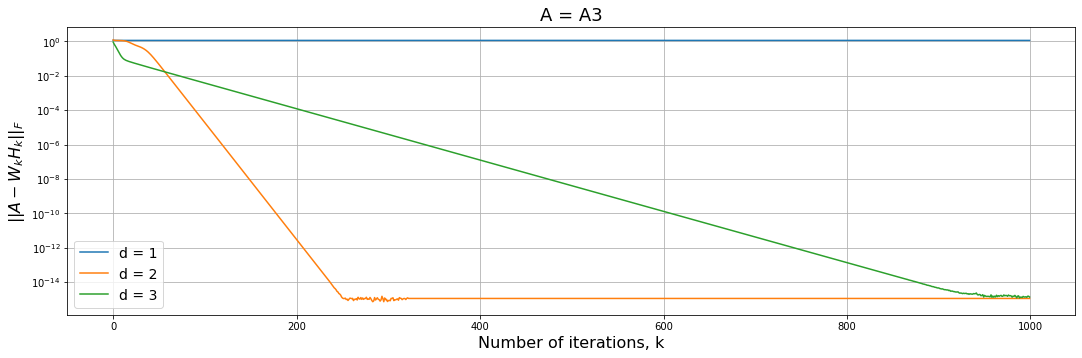

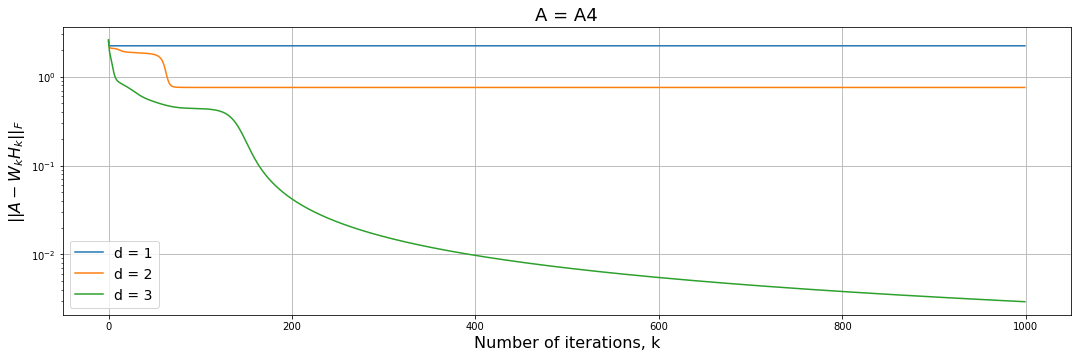

In [ ]:
def ex1g():
    A3 = np.array([[2, 1, 1], [2, 1, 1], [1, 1, 2]])
    A4 = np.array([[2, 1, 0], [1, 2, 3], [0, 3, 3]])

    dList = [1,2,3]

    maxIterations = 1000
    kArray = np.arange(0, maxIterations, 1)

    plotTitles = ['A3', 'A4']
    i = 0    # For plot titles

    for A in [A3, A4]:
        plt.figure(figsize=(10, 5))
        plt.axes([0, 0, 1.4, 0.8])
        for d in dList:
            norm = NMF(A, d, maxIterations, seed = 4)[2]
            plt.plot(kArray, norm, label = f'd = {d}') 
        plt.legend(fontsize = 14)
        plt.title(f'A = {plotTitles[i]}', fontsize = 18)
        plt.xlabel('Number of iterations, k', fontsize = 16)
        plt.ylabel(r'$||A - W_k H_k||_F$', fontsize = 16)
        plt.semilogy()
        plt.grid()
        plt.show()
        i += 1
ex1g()

Above are plots showing how the norm changes as the number of iterations increases. Total number of iterations is set to 1000. It is clear from the plots that the norm is either stable or decreases as the number of iterations increases, so the update algorithm does seem to satisfy equation $(10)$ in the project description,

$$
||A - W_{k+1} H_{k+1}||_F \leq ||A - W_k H_k ||_F.
$$

Note that the norm never really converges to true zero, but the machine epsilon, which is approximately $10^{-15}$ for a 64-bit computer. However, when commenting the plots, we say it converges to zero.

The plots are quite different for the two different matrices $A_3$ and $A_4$. The number of steps required for the algorithm to converge, that is, the number of steps before the norm reaches a local minimum, varies with $d$. For $d=1$, the norm converges, approximately instantaneously, for both matrices to around $1$ and $2$ respectively, meaning the NMF-factorization does not produce a very accurate representation of the original matrices. For $d=2$, the norm converges for both matrices, but while it goes to zero for $A_3$ very fast, it stabilizes at just less than $1$ for $A_4$. As discussed above, this is expected, as $A_3$ is a rank $2$ matrix. For $d=3$ for the $A_4$-factorization, it is unclear whether the norm converges to zero or not given enough iterations, since it converges so slowly. However, the norm does seem to approach som value close to $10^{-3}$ asymptotically. In that case, the $NMF$ does not yield a perfect recreation as expected. This might be due to the fact that the norm might have several local minimas, and the algorithm might get stuck in one such local minima instead of converging towards the global minima. Whether the algorithm does this or not might depend on the initialization of $W$ and $H$. A different seed in the $NMF$ might yield different results. The non-negativity constraint might also limit the approximation.

A peculiar observation of the $A_4$ plot is the sudden crack in the graph for $d=2$ and $d=3$. This could be explained by imagining a topological surface, and the algorithm moving along this surface. Some places are steep, some are flat, some places there are deep valleys, corresponding to local minimas, while some places there are mountain tops, corresponding to local maxima. The algorithm, converging towards local minimas, does only realize steps that moves it to a point that is lower on the surface. On this surface, the algorithm could find itself located in a flat area where, no matter where it moves, the change in height is small. At some point, it might go from moving in a flat area to moving in a steep area, where the change of height in one step suddenly is big. This does not explain the cracks mathematically, but is a good analogue to think about how the algorithm moves and converges.

A weakness of NMF is, as mentioned, the enforcing of non-negativity which may cause a loss of important data, as key features for some matrix systems are represented by negative values. In practice, this means that a matrix might not be fully constructed by basisvectors that are added together - subtraction might also be necessary. The NMF cannot do this, it is an exclusively additive method, since the weights in $H$ which determines the linear combinations of the basisvectors in $W$ are always non-negative. Another weakness is the fact that the norm converges towards a local minimizer, not global, meaning the algorithm does not necessarily produce an optimal reconstruction of the original matrix for a given $d$. Note however that even local minimas are useful for many objectives. To examine whether any of these weaknesses might have played a role in the resulting plots above, it is appropriate to compare the results with results from a method that does not share the same weaknesses. 

The SVD-method discussed in the project description has two, and probably more, important properties that separates it from NMF. One is, it does not require non-negativity. The other one is, a truncated SVD reconstruction of a matrix $A$ will always be the best possible reconstruction of $A$ with regards to the Frobenius norm. This means that for a specified $d$, the SVD algorithm is certain to find the global minimum of $||A - Ã||_F$, where $Ã$ is the truncated SVD reconstruction of rank $d$. 

By comparing the convergence value of the norm for the two different methods, it will be clear whether the NMF has indeed found a best possible factorization of the original matrix, or if it $I)$ converges towards some local minmizer or $II)$ is limited by the non-negativity requirement. Only a comparison of the final value of the norm will be made, as it is the convergence value that is of interest here, not the rate at which it converges.

In [ ]:
def ex1g_SVDComparison():
    """
    Function for 
    Input:
        None.
    Output: 
        None.
    """
    A3 = np.array([[2, 1, 1], [2, 1, 1], [1, 1, 2]])
    A4 = np.array([[2, 1, 0], [1, 2, 3], [0, 3, 3]])

    dList = [1,2,3]

    matrixLabel = ['A3', 'A4']
    i = 0    # For matrix labels

    for A in [A3, A4]:

        for d in dList:

            U, Sigma, VT = np.linalg.svd(A)

            smat = np.diag(Sigma)

            svd = U @ smat @ VT

            norm = np.linalg.norm(A - svd, 'fro')

            """ Reduce dimension to specified rank """
            rank = d
            U_redusert = U[:, :rank]
            smat_redusert = np.diag(Sigma[:rank])
            VT_redusert = VT[:rank, :]
            
            svd_redusert = U_redusert @ smat_redusert @ VT_redusert

            norm_redusert = np.linalg.norm(A - svd_redusert, 'fro')

            #print(f'SVD for {matrixLabel[i]}, rank {d}:\n', svd_redusert, '\n')
            print(f'Norm SVD for {matrixLabel[i]}, rank {d} approximation:', norm_redusert, '\n')

        i += 1

ex1g_SVDComparison()

Norm SVD for A3, rank 1 approximation: 1.14841379830242 

Norm SVD for A3, rank 2 approximation: 2.4525628233156873e-15 

Norm SVD for A3, rank 3 approximation: 2.4525628233156873e-15 

Norm SVD for A4, rank 1 approximation: 2.231680019120091 

Norm SVD for A4, rank 2 approximation: 0.7577017654507557 

Norm SVD for A4, rank 3 approximation: 5.0895131002843784e-15 



For $A_3$, the NMF seems to produce the best possible reconstructions for all ranks, as the convergence value of the norm is the same as for the SVD. For $A_4$, the convergence value seems to be the same for rank 1 and 2, while for rank 3 it is zero for the SVD. It is difficult to see whether it converges to zero or not given enough iterations for NMF, but it is possible that either the non-negativity constraint or convergence towards a local minima has limited the NMF, compared to the SVD, for this rank. 

## Task 2

In the following section, the Cryptopunk dataset will be investigated through the lens of the NMF method. The methods ability to extract underlying features from a dataset, as well as yielding a representative reconstruction of the original data in a new, compressed dataset, will be tested experimentally. 

The Cryptopunk dataset which will be examined consists of in total 10000 unique images. In this project, 500 of these will be randomly selected and represented in a 4-dimensional, numerical array. Experiments with NMF will be conducted on these randomly selected images.

In [ ]:
def load_images(N):
    """
    Loads images from cryptopunk dataset. Loading order is deterministic,
    so for a certain N the exact same images will be loaded. 
    Input:
        N:       integer, number of images to load
    Output:
        faces:   (24,24,4,N) numpy array containing images
    """

    """ Allocate array to store images """
    faces = np.zeros((24,24,4,N))

    """ Iteration variable """
    i = 0

    """ Iterate over folders """
    for subdir, dirs, files in os.walk('./imgs'):

        """ Iterate over files """
        for file in files:

            """ Filepath to load from """
            filepath = subdir + os.sep + file

            """ Make sure that the file is a .png """
            if filepath[-3:] == 'png':

                """ Load the image """
                im = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)

                """ Convert it to RGBA and rescale pixels """
                faces[:,:,:,i] = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA)/255.0

                i+=1
            if i == N:
                break
    return faces

""" Global variables to be used later """
maxIterations = 1000
N = 500                        # Number of faces to keep in final array
faces = load_images(10000)     # Load all 10000 images
choices = np.random.choice(faces.shape[-1], N, replace = False)
faces = faces[:,:,:,choices]  

print("The shape of faces: ", faces.shape) # Shape of faces

The shape of faces:  (24, 24, 4, 500)


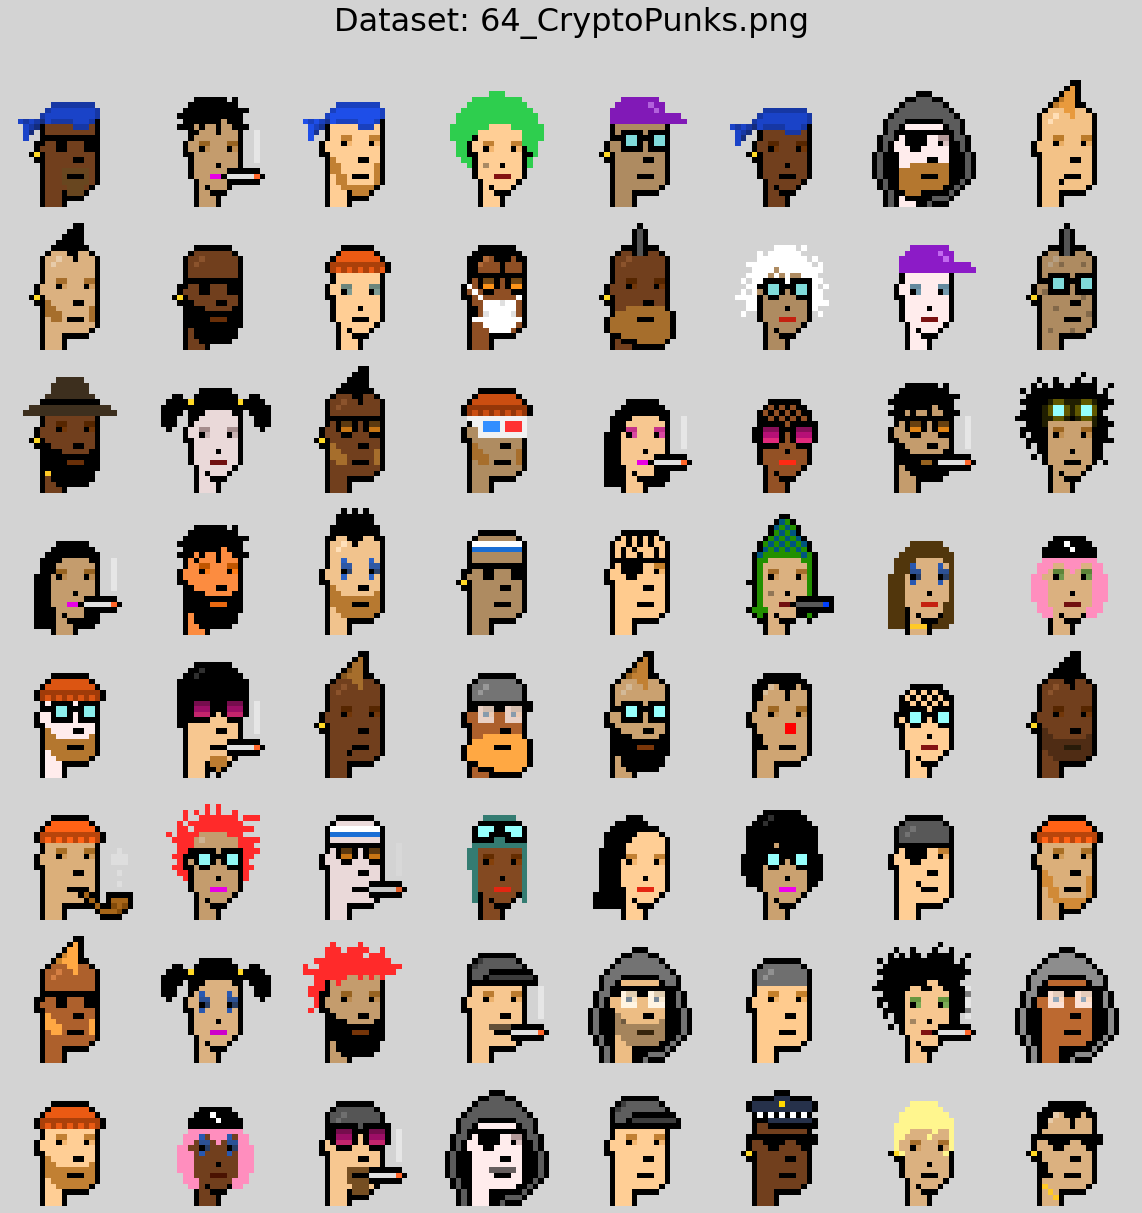

In [ ]:
def plotimgs(imgs, d, nplot = 8, rescale = True, filename = None):
    """
    Plots nplot * nplot images on an nplot x nplot grid. 
    Saves to given filename if filename is given
    Can also rescale the RGB channels
    Input:
        imgs:      Numpy array, (24,24,4,N) or (24,24,3,N) array containing images, where N > nplot**2
        nplot:     integer, nplot**2 images will be plotted
        rescale:   bool
        filename:  string, figure will be saved to this location. Should end with ".png".
    Output:
        Plot of imgs.
    """
    """ We will change some of the parameters of matplotlib, so we store the initial ones """
    oldparams = plt.rcParams['figure.figsize']

    """ New params to make better plot. There definitely exists better ways of doing this """
    plt.rcParams['figure.figsize'] = (16, 16)
    
    """ Initialize subplots """
    fig, axes = plt.subplots(nplot,nplot)

    """ Set background color """
    plt.gcf().set_facecolor("lightgray")

    """ Iterate over images """
    for idx in range(nplot**2):
        
        """ Indices """
        i = idx//nplot; j = idx%nplot

        """ Remove axis """
        axes[i,j].axis('off')

        """ Rescale RGB channels by dividing my maximal value """
        if rescale:
            scaled_img = np.copy(imgs[:,:,:,idx])
            scaled_img[:,:,:3] = scaled_img[:,:,:3]/np.max(scaled_img[:,:,:3])
            axes[i,j].imshow(scaled_img)
        else:
            axes[i,j].imshow(imgs[:,:,:,idx])
    
    """ Tight layout so images will appear closer together """
    plt.tight_layout()

    """ Save if filename is given """
    if filename is not None:
        plt.savefig(filename)
    if (d!= None):
        fig.suptitle(f"Dataset: {filename}, d = {d}", fontsize = 32, x = 0.5, y = 1.05)
    else:
        fig.suptitle(f"Dataset: {filename}", fontsize = 32, x = 0.5, y = 1.05)

    plt.show()

    """ Return to old parameters """
    plt.rcParams['figure.figsize'] = oldparams


# Example of plotting 8 times 8 images stored in "faces" and saving the output to a file named "punks.png"
plotimgs(faces, d = None, nplot= 8, filename="64_CryptoPunks.png")

Number of pixels with no opacity:  166
Rank of matrix containing images:  373


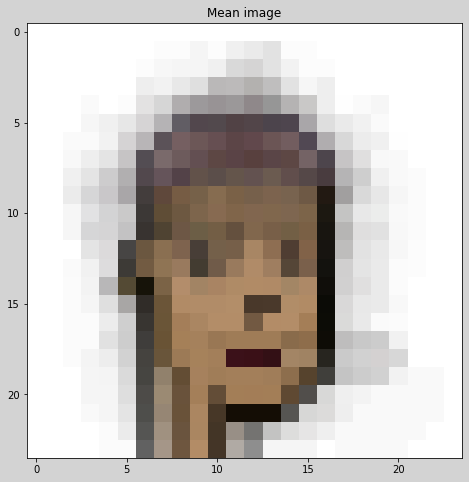

In [ ]:
def plotMeanImage(imgs):
    """
    Loads image array "faces" with N = 500 images from Cryptopunk dataset. Loading order 
    is deterministic for certain seed.
    Input:
        imgs:   Numpy array, array of images from which the mean image is calculated
    Output:
        plot of the mean image, (24,24,4) numpy array mean image
    """
    meanFace = np.mean(imgs, axis = -1)
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.gcf().set_facecolor("lightgray")
    ax.set_title("Mean image")
    ax.imshow(meanFace)

    """ Number of pixels with no opacity """
    print("Number of pixels with no opacity: ", len(np.argwhere(meanFace[:,:, 3] == 0.0)))

    """ Finding the rank of the matrix by finding the number of non-zero singular values """
    facesRGB = faces[:,:,:3, :]
    singVals = np.linalg.svd(facesRGB.reshape((np.prod(facesRGB.shape)//N, N)))[1]
    print("Rank of matrix containing images: ", len(singVals[singVals > 1E-9]))

plotMeanImage(faces)

In the above plot a representation of the average pixel occurence density of the dataset is depicted. Hence, darker colours resemble greater occurence, and brighter colours resemble lower occurence, i.e. white resemble no occurence. 


If a pixel in the average image has an opacity equal to zero, it implies that all associated pixels in all of the $500$ images must have an opacity value equal to zero. This is because the only way that an average value can be equal to zero is that if all the values ​​used to calculate the average are equal to zero. 

The mean image resembles a blurry face. Some pixels have high opacity, meaning these pixels contain features that are shared by more images. An example is the countour line of the face, which gives some indication of the average shape of the face for the $500$ images, and that most faces have the same position in the image. Examining the original images, it seems like all male faces share the same face shape, and the same for all female faces. This corresponds to a large number of pixels sharing the same values, and explains the high opacity contour line in the mean image. A resemblance of a mouth and two eyes are also apparent, meaning that for most of the images these features are contained in those high opacity pixels. The low opacity pixels surrounding the face tells us that some images include features outside of the average face shape, but these features are unique for one or a few images since the opacity is so low for these pixels.   

From knowing the number of pixels with no opacity in the mean image, an upper bound estimate of the rank of the matrix containing all 500 images can be made. Each image is made up of $24 \cdot 24 = 576$ pixels, and subtracting the number of no-opacity pixels in the mean image, which is 166, and then multiplying by the number of colour channels, 3, an upper bound for the rank is found to be $1230$. This estimate is found assuming all pixels with opacity in the mean image do have opacity in all separate $500$ images, which they most certainly do not. That is why it is an upper bound estimate, and a very rough one. 

The actual rank can be found by finding the number of non-zero singular values. It is only of interest to find the rank of the matrix containing the three colour channels exclusively, as the opacity channel will be excluded from the NMF computation. In order to find the rank, the $(24 \times 24 \times 3 \times 500)$-matrix must be reshaped to a two dimensional $([24 \cdot 24 \cdot 3] \times 500)$-matrix. This is done in the code above, using built-in NumPy functions. The rank is found to be 373. Essentially, what this tells us, is that the column space in which the information about all 500 images are contained, is of dimension $373$, i.e. it is spanned by 373 linearly independent (singular) vectors. Hence, the rank gives a lower bound for which $d$ is necessary in order to reconstruct an original matrix with 100% precision through NMF, as $W$ must contain at least the same number of basis vectors in order to span the same column space.

Since the rank is smaller than both the number of rows and columns in the original matrix, we know that all the information stored in the original matrix could be contained in a significantly smaller - compressed - dataset, as many of the singular vectors are linearly dependent and thus superfluous in the representation of the data. Compressing the dataset, i.e. represent the data in fewer elements, is exactly what NMF intends to do. However, as NMF requires non-negativity, it is unlikely that it is capable of yielding a 100% reconstruction for such a large dataset, no matter how large $d$ is chosen.

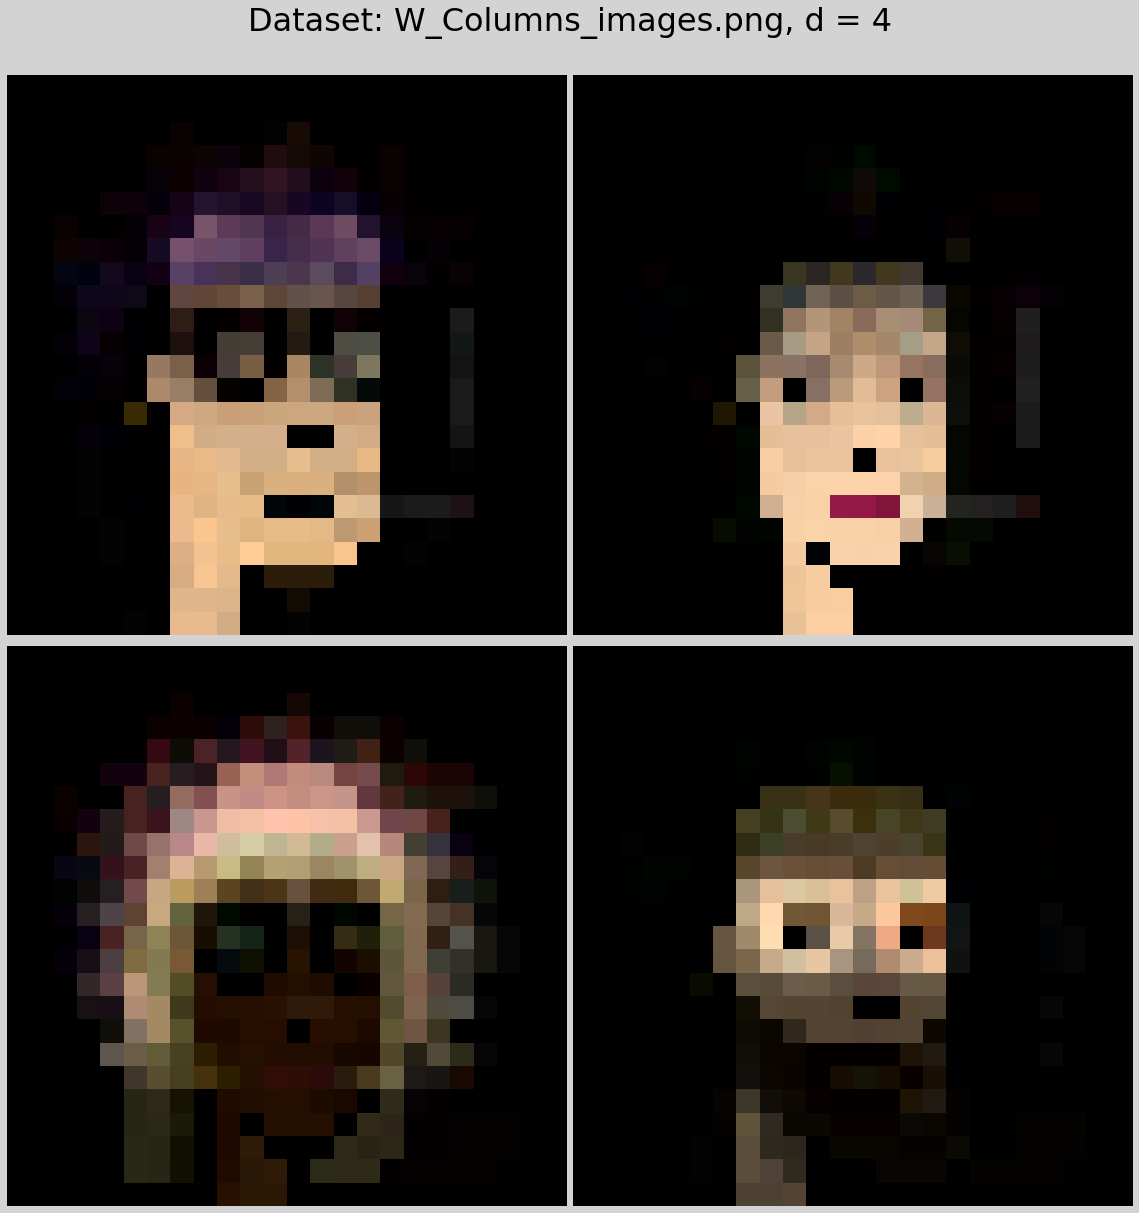

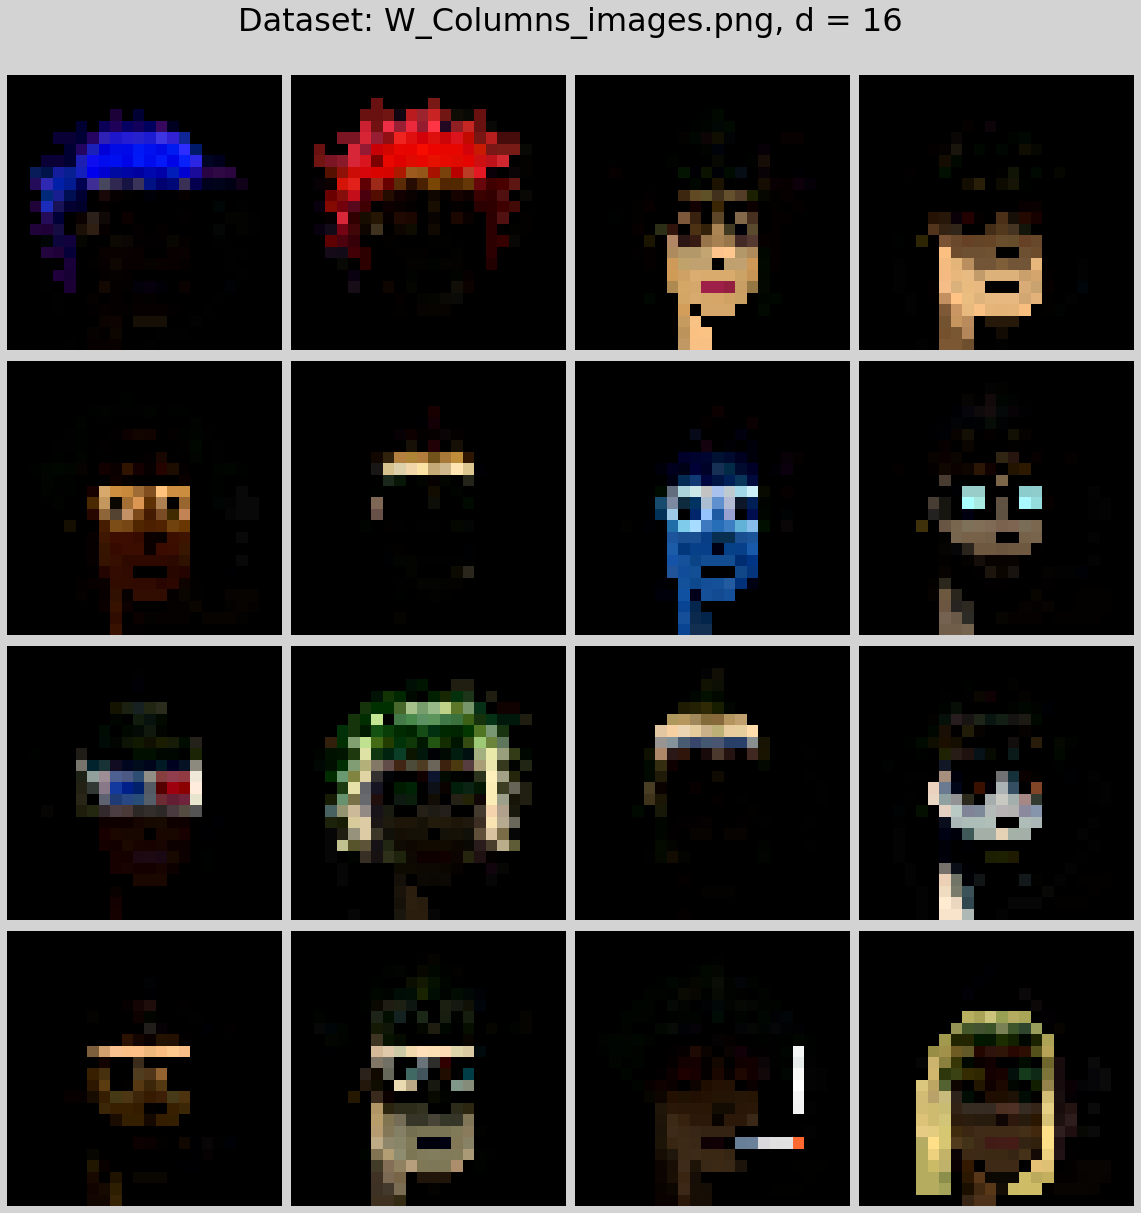

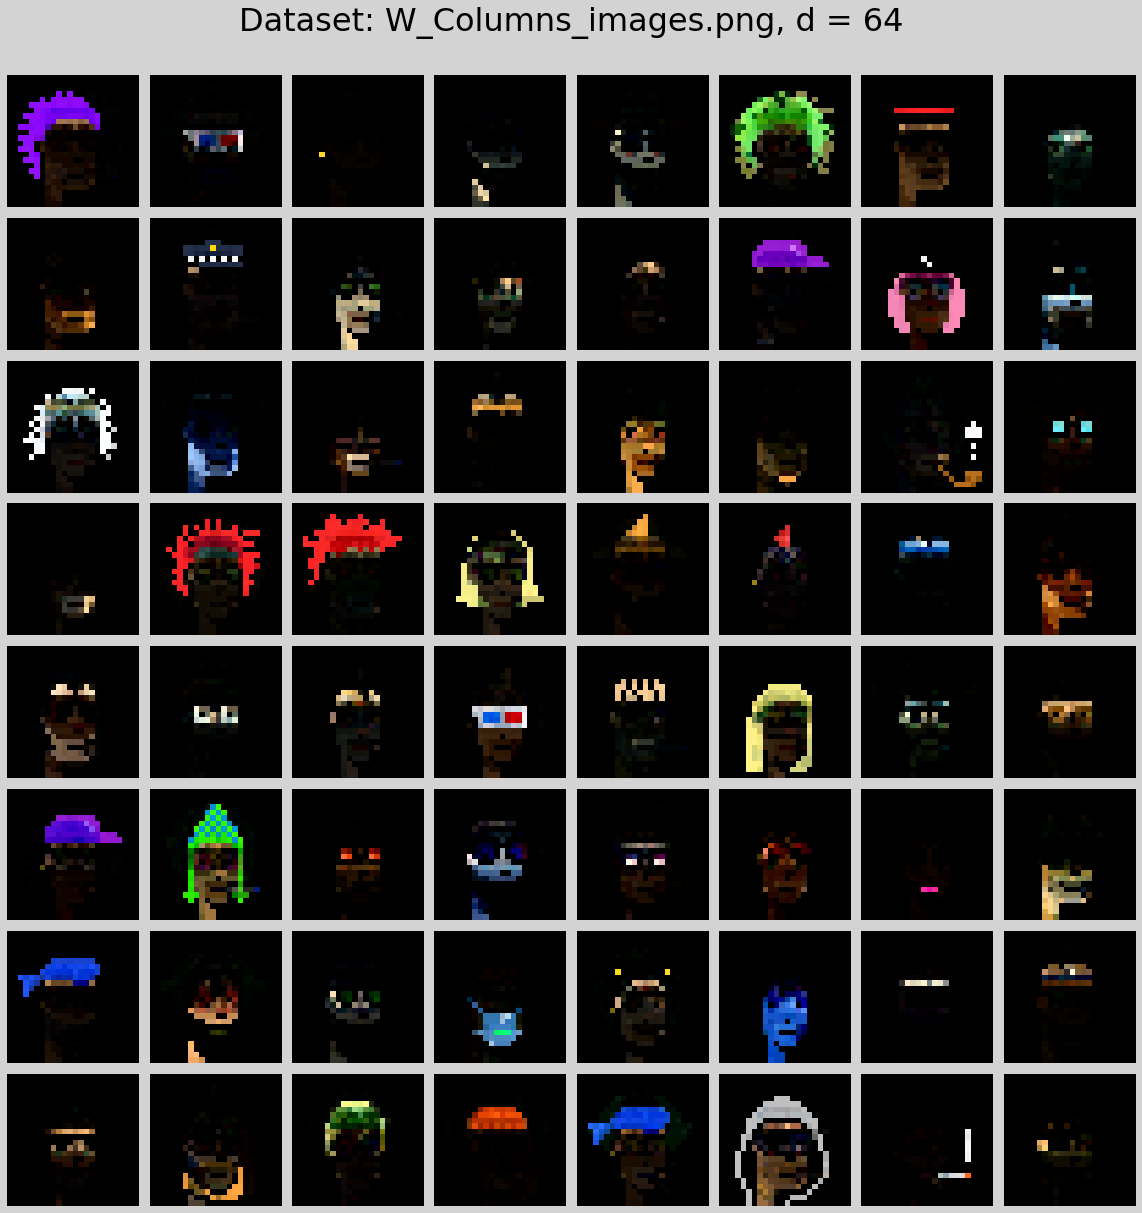

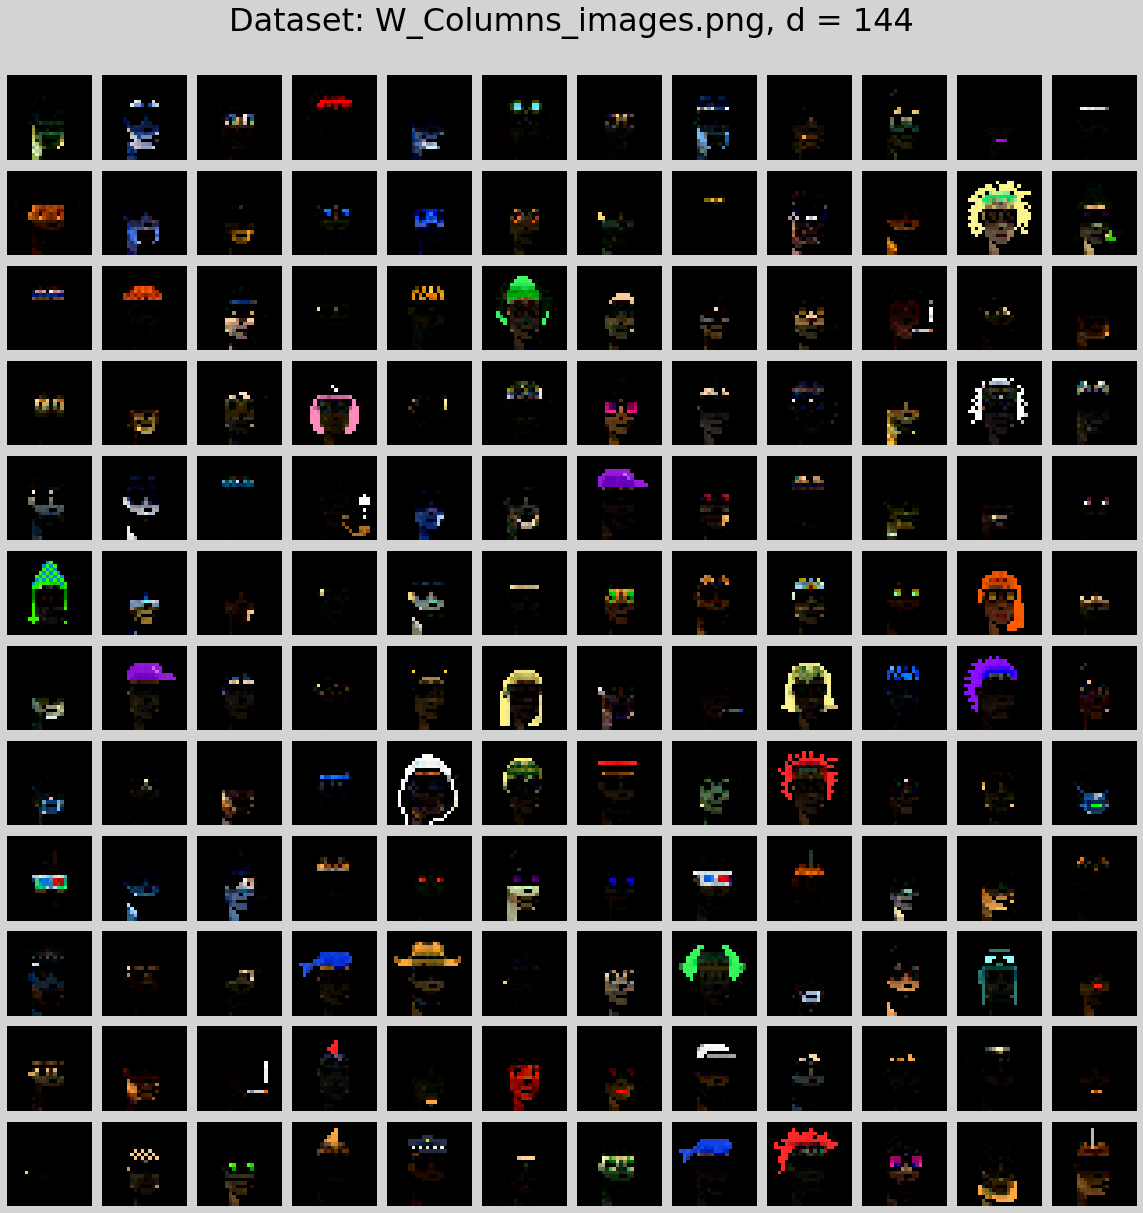

In [ ]:
def NMFImages(V, d, maxIterations, H = None, W = None, seed = None):
    """
    Multiplicative update algorithm in according to Lee and Seung's update rule.
    Tailored to fit the cryptopunk dataset.
    Input:
        V:             input array containing images stored as(24,24,4,N)
        d:             integer, Number of components we want to decompose V into
        maxIterations: integer, maximum number of iterations
        seed:          integer, random seed
    Output:
        W:             Numpy array, (m x d) array
        H:             Numpt array, (d x n) array
    """

    """ Setting the machine error """
    import struct; numberBits = 8 * struct.calcsize("P")
    if numberBits >= 64:
        machineError = 1E-15
    else:
        machineError = 1E-7 # 32 bit precision is = 1E-7

    """ Stores the opacity channel in 24 x 24 x N array """
    opacityMatrix = V[:,:, 3, :]   

    """ Removes the opacity channel from V """
    imagesRGB = V[:,:,:3, :] 
    
    """ Reshapes matrix to (1728 x N) shape """
    V = np.reshape(imagesRGB, (np.prod(imagesRGB.shape)//V.shape[3], V.shape[3])) 

    M = V.shape[0]
    N = V.shape[1]

    """ Random initialization of W and H """
    if seed != None:
        np.random.seed(seed)
    if W is None:
        W = np.random.rand(M, d) * np.sqrt(np.mean(V) / d)
    if H is None:
        H = np.random.rand(d, N) * np.sqrt(np.mean(V) / d)
    
    normsList = np.zeros(maxIterations)

    """ The multiplicative update algorithm """
    for n in range(maxIterations):
        H_next = H * (W.T @ V)        /   (W.T @ W @ H + machineError)
        W_next = W * (V @ H_next.T)   /   (W @ H_next @ H_next.T + machineError)

        H = H_next
        W = W_next

        normsList[n] = np.linalg.norm(V - W @ H, 'fro')

    assert not np.min(H) < 0 or not np.min(W) < 0, "Negative numbers in NMF"

    return W, H, opacityMatrix, normsList


def ex2c():
    dList = [4, 16, 64, 144]
    WList = []
    HList = []
    for d in dList:
        W, H, opacityMatrix, norm = NMFImages(faces, d, 1000)
        WList.append(W); HList.append(H)
        W_reshaped = np.reshape(W,(24,24,3,d))
        plotimgs(W_reshaped, d, int(np.sqrt(d)), filename=f"W_Columns_images.png")
    return W_reshaped, WList, HList, dList, opacityMatrix

""" Global variables """    
W_reshaped, WList, HList, dList, opacityMatrix = ex2c()

In the above plot, the columns of $W$, extracted by the NMF, are plotted separately in grid images. This is done for $d=\{4, 16, 64, 144\}$, respectively. The columns of $W$ are the basis vectors of the new subspace that the images are projected onto. Each vector contains some feature of the original images, so that specific linear combinations of these basis vectors should yield a representative reconstruction of the original images. The specific linear combinations are given by the weights that make up the elements of $H$. 

The contents of the different columns in $W$ differ, however each of them capture some underlying feature, e.g. hair, glasses, hats, cigarettes etc. Some of the grid images show clear resemblance of specific features, however others show weaker distinction between distinct physical features, that, from a human standpoint, are harder to interpret as single features. One explanation for this is that, since the pictures are represented as numbers in numerical matrices, and not by actual physical objects, the computer does not distinguish between real life objects and features that produce a precise matrix reconstruction. 

The consequence of altering the rank of the factorized matrices is that it changes the precision of the reconstructions, so that a higher rank reconstruction is more true to the original matrix, than a lower ranked one. In a higher ranked NMF, the number of basis vectors, meaning the number of storage units that hold information about characteristics of the original matrix, is greater than in a lower ranked one. In a sense, this means that the "information density", meaning the distinctiveness of the characteristic that the basis vector represents, of each basis vector is decreased, hence allowing each basis vector to store smaller, less distinct features, with higher precision. For the reconstruction of the Cryptopunk dataset, increasing the rank of the NMF, hence, means also increasing the number of basis vectors that are able to represent such special features. This is exactly what is evident in the above plots for varying rank ($d=\{4, 16, 64, 144\}$). The lower ranked NMF ($d = \{4,16\}$) predominantly shows grid images with whole faces that consist of more than one feature, however, the higher ranked NMF ($d = \{64, 144\}$) shows grid images with single features. The reconstructions will be further examined in the following sections.

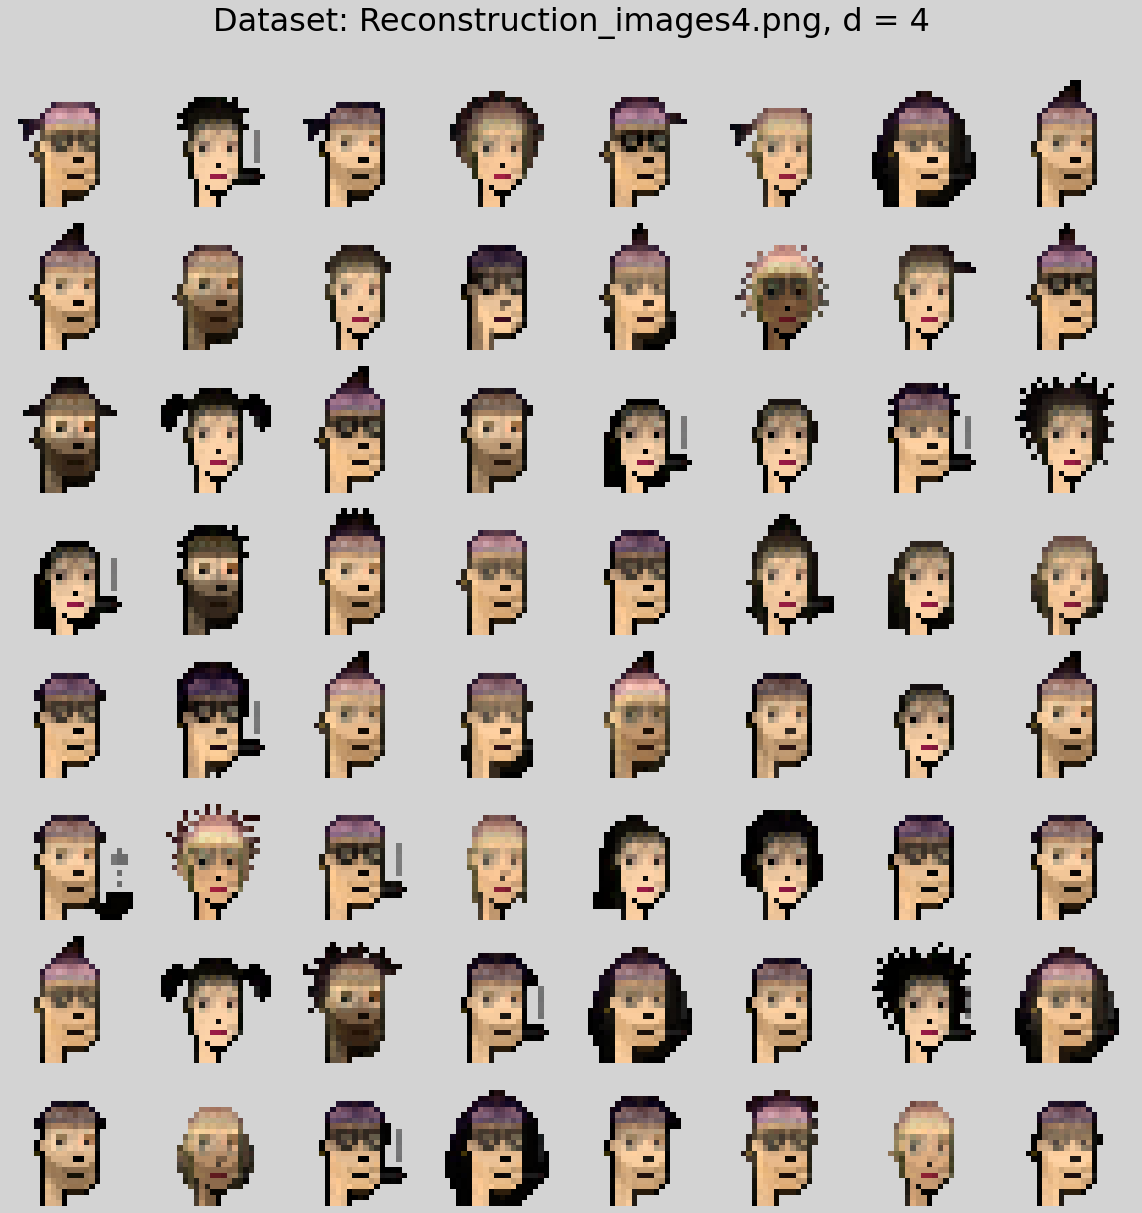

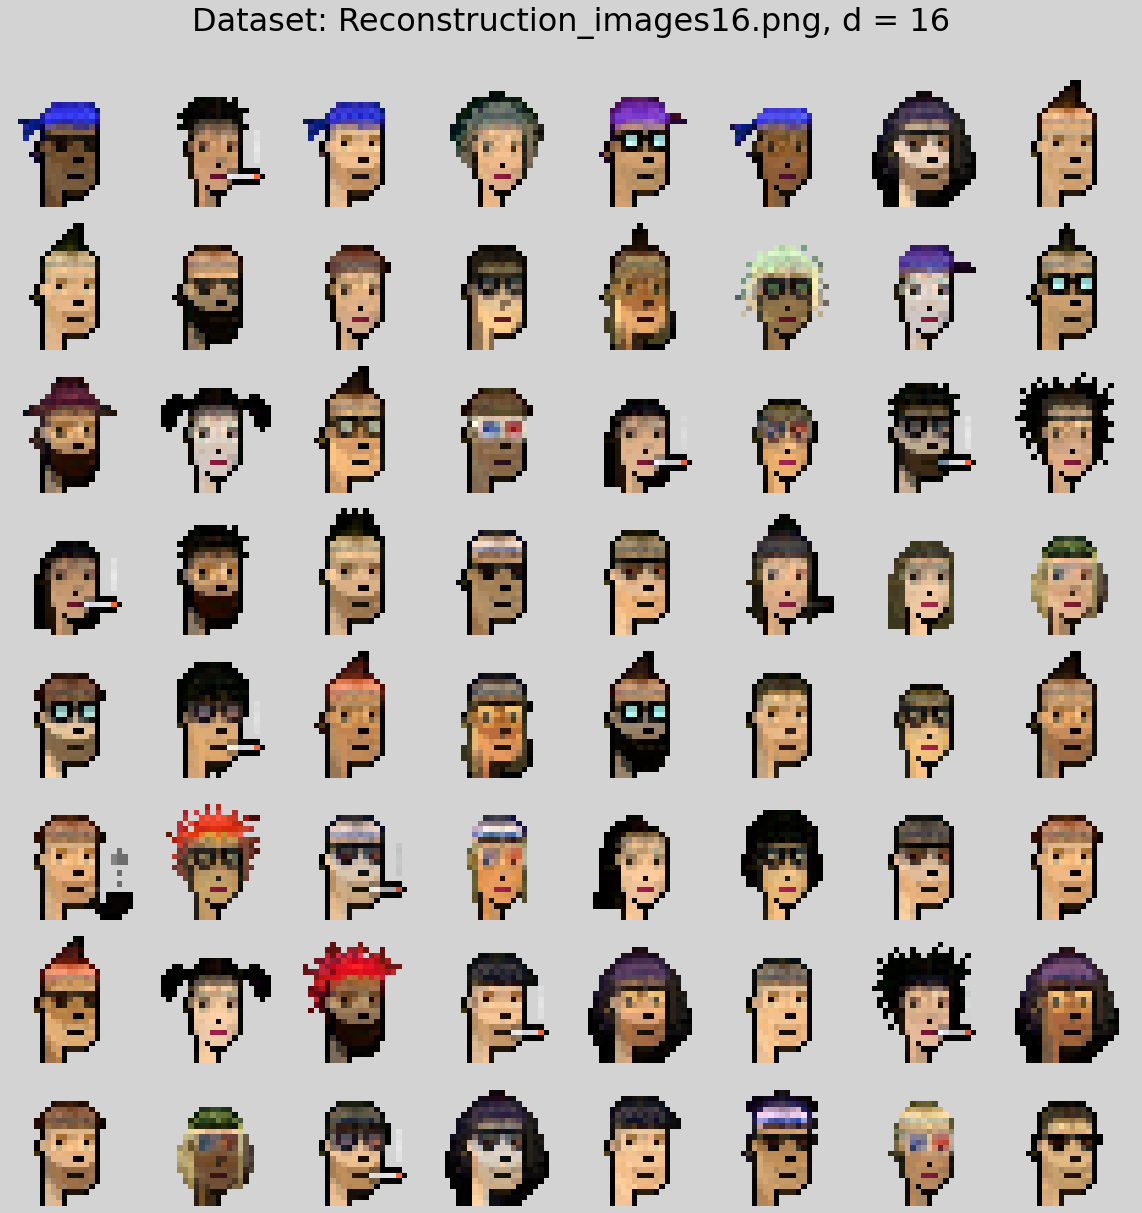

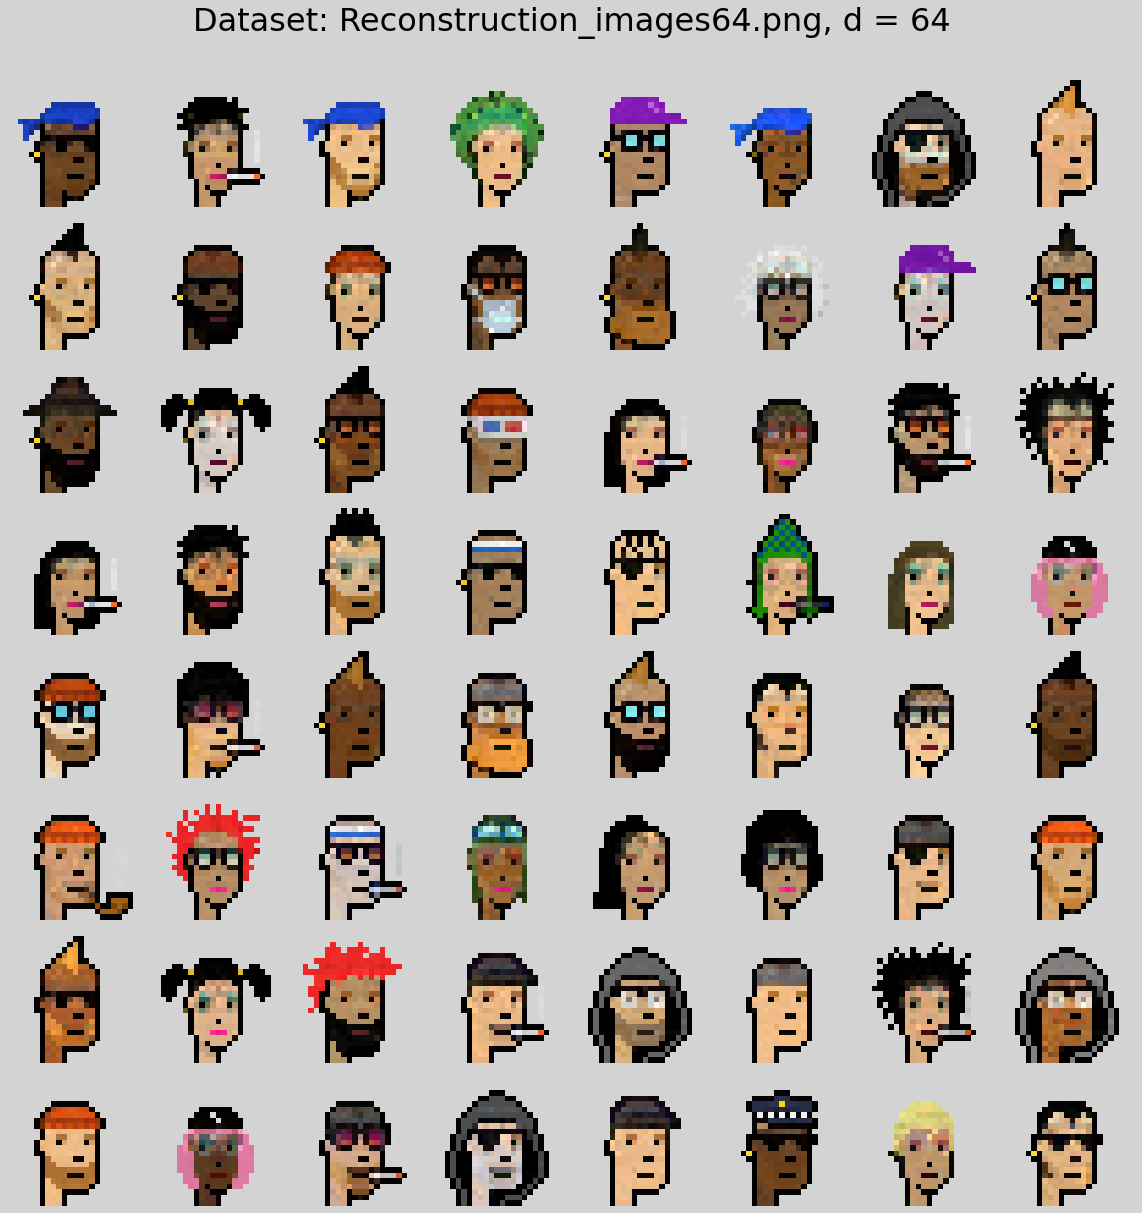

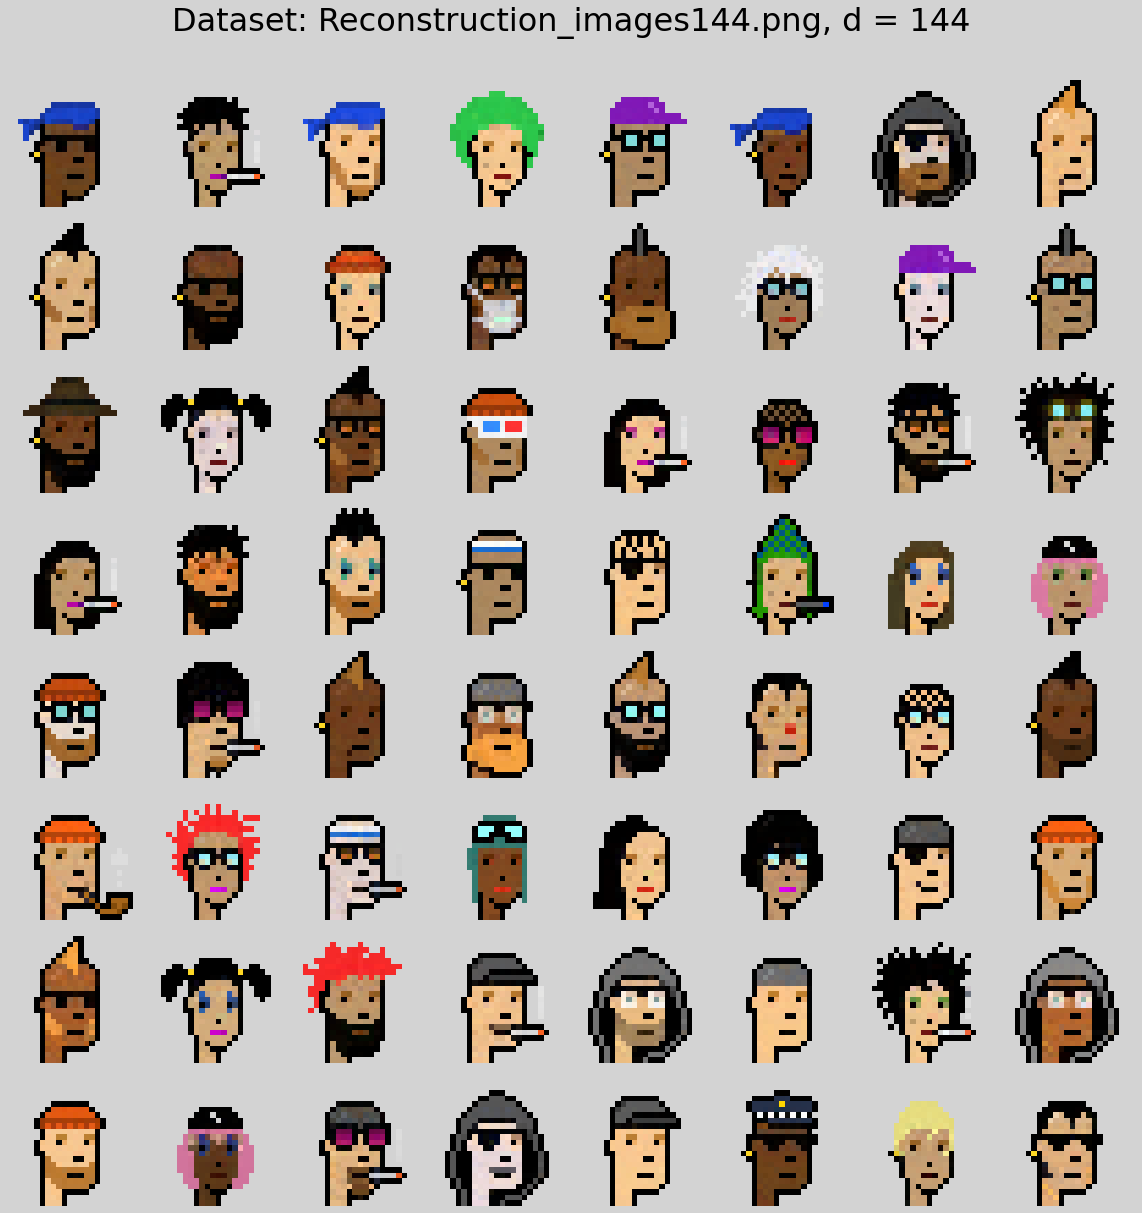

In [ ]:
def ex2d():
    for W, H, d in zip(WList, HList, dList):
        
        """ Reconstructing RGB channels """
        reconstruction = W @ H
        facesWithOpacity = np.zeros(faces.shape)
        facesWithOpacity[:,:,:3,:] = reconstruction.reshape(faces[:,:,:3,:].shape)
        
        """ Adding opacity channel """
        facesWithOpacity[:,:,3,:] = opacityMatrix

        plotimgs(facesWithOpacity, d, 8, filename=f"Reconstruction_images{d}.png")

        """ Saving the d=64 reconstruction for later tasks """
        if d == 64:
            saveFaces = facesWithOpacity

    return saveFaces

facesWithOpacity = ex2d()

The reconstruction to a matrix from its constituating NMF-factors has several effects on the resulting matrix. Above are the reconstructions of the original images, given by the NMF-method, for rank $d = \{4, 16, 64, 144 \}$, and the reconstruction plots are vastly different.

$\textbf{d=4}$: The reconstruction of the grid images from the rank $4$ NMF seem to grasp contours and the most dominant facial features, however the reconstructions are oddly homogenous. A peculiar observation is that the outline of the characters seem to be preserved, and not expanded nor shrinked, even for $d=4$ - which is surprising because other facial features seem so dissociated. What is the most elegant about this observation is that from a basis of 4 different features ($W$'s), the product produces so many distinct outlines (!). By simply looking at the outline of the initial features for the $d=4$ it seems "impossible" that a linear combination of only these features can produce all the reconstructions, because the outlines of the initial features seemed to be so clear cut. However by assessing the initial features with a digital colourmeasurer, very dim pixels become apparent, meaning that feature basises span a wider subspace than what the human eye can distinct. This can of course also be examined by assessing the matrices directly, however we thought that this, from a human point of view, was a fascinating and illustrational point to make about NMF. 

$\textbf{d=16}:$ In the reconstruction of the grid images from the rank $16$ NMF, more details, such as more distinctive coloured features and sharper contours are apparent. The grid images still look grainy, however they are starting to resemble the original dataset. 

$\textbf{d=64}:$ The reconstructions are recognizable and quite precise, however, there is some deviation from the original images. The skin colour on the faces vary with different shades. The colours look more diluted, and especially the stronger colours are not as bright and clear in the reconstructions. Overall, the original image look cleaner and sharper. Some features that were shared by multiple images appear differently in separate images in the reconstruction, meaning the adding of multiple features might have disturbed the appearance of each of them individually. Some features, however, seems to be extracted and reconstructed with high precision, such as the 3D-glasses.

It is of interest to give a quantitive measure of the compression of the dataset, and we do this by calculating the percentwise reduction in dataset size. The original matrix contains a total of $24 \cdot 24 \cdot 3 \cdot 500 = 864000$ elements. The compressed $WH$ approximation contains a total of $24 \cdot 24 \cdot 3 \cdot 64 + 64 \cdot 500 = 142592$ elements. This corresponds to a compression of 83,5% of the original dataset, i.e. now storing the data in a dataset 16,5% the size of the original one. 6 times the number of images can be stored in the compressed $WH$ form, however, one must take into consideration the loss of data.

It is as expected that $d=64$ is not sufficient to yield a perfect reconstrution of the original images. The image matrix was found to have a rank of $373$, meaning significantly more basis vectors than 64 is required to extract all the information of the original images. However, the reconstructions are recognizable, and for certain objectives, such a compression is of very good use. What degree of precision is tolerable depends on what the data are to be used for. In the case of image compression, one would in most cases seek for a more precise reconstruction than the one showed in the plots above.

$\textbf{d=144}:$ The $d=144$ reconstruction is similar to the $d=64$ reconstruction in that the characters in a greater detail are starting to resemble the original dataset, however colours are slightly more crisp and popping, and the skin of the characters are slightly smoother for the $d=144$ reconstruction. The reconstruction still does not exactly equal the original image set, however, from a human standpoint, the characters are now distinct and unique, meaning that the characters from the reconstruction can unambigously be mapped onto the original dataset in a one to one mapping between the associated images.  

As discussed in earlier sections, a weakness of NMF is the enforcement of non-negativity. In the case of image processing, even though the orignal matrices are non-negative, they could, and most likely do, produce negative eigenvalues and eigenvectors. This means that linear combinations of some key features does not exclusively add together, but also subtract and cancel out. In practice, this could mean that if some basis vector contains the eyes, and another contains a hairstyle, and these two overlap for some pixels, we could have another basis vector with negative elements which ensures that in the overlapping of the hair and eyes, the eyes are hidden behind the hair. Because the NMF is exclusively an additive method, meaning the matrix is reconstructed by positive linear combinations of non-negative basis vectors, some features can overlap and disturb the appearance of one another. This is why in some cases, a perfect reconstruction is impossible with NMF, no matter how large $d$ is chosen.

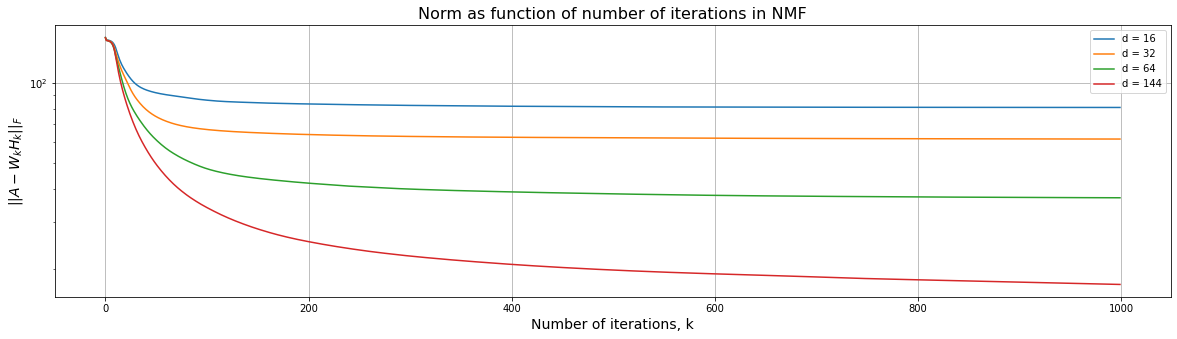

In [ ]:
def ex2e():
    maxIterations = 1000 
    kList = np.arange(0, maxIterations, 1)
    dList = [16, 32, 64, 144]

    plt.figure(figsize=(20, 5))
    for d in dList:
        norm = NMFImages(faces, d, maxIterations)[3]
        plt.plot(kList, norm, label = f'd = {d}') 
    plt.legend()
    plt.title(f'Norm as function of number of iterations in NMF', fontsize = 16)
    plt.xlabel('Number of iterations, k', fontsize = 14)
    plt.ylabel(r'$||A - W_k H_k||_F$', fontsize = 14)
    plt.semilogy()
    plt.grid()
    plt.show()
ex2e()

Above are plots showing how the norm changes as the number of iterations increases in the NMF algorithm, for $d=\{16, 32, 64, 144\}$. In the previous sections, NMF reconstructions for $d=16$, $d=64$ and $d=144$ have been examined. For $d=16$, the reconstructions were dissociated and blend, and few distinct features were reconstructed with high precision. For $d=64$, more features were learned and reconstructed to a higher degree of precision, however, the deviation from the original images were noticeable. For $d=144$, the reconstructions were sharper and more detailed features were more apparent. It is difficult to predict exactly which convergence value for the norm the different rank approximations will yield just by examining the plots, and it is also difficult to say something about how well the images are reconstructed for a given convergence value of the norm. One must take into consideration the size of the matrix that is reconstructed, and the scaling of the values in the matrix. The norm is proportional to the scaling, and in general more non-zero elements corresponds to a larger norm (not always). We have a $(24 \cdot 24 \cdot 3 \times 500)$-matrix, where all elements hold a value between $0$ and $1$. 

The norm converges to a value of around $85$ and $65$ for $d=16$ and $d=32$ respectively, while for $d=64$, it converges to around $40$. The algorithm requires more iterations before it converges for higher rank approximations, hence it is somewhat difficult to see whether the norm has indeed converged to a final value for $d=144$. However, the graph undoubtedly flats out close to $1000$ iterations, and it seems to converge to a value close to $10$.

It is as expected that the norm converges to a smaller value for higher rank approximations, however as discussed above, it is difficult to conclude anything from each convergence value individually. To really know anything about the precision, in the practical sense, not numerical, of the image reconstructions, one must examine the plots, not the value of the norm. Comparing different values of the norm for different rank approximations however, is useful, and tells us something about the cost/benefit-ratio of increasing rank, which will be further examined in the next section.

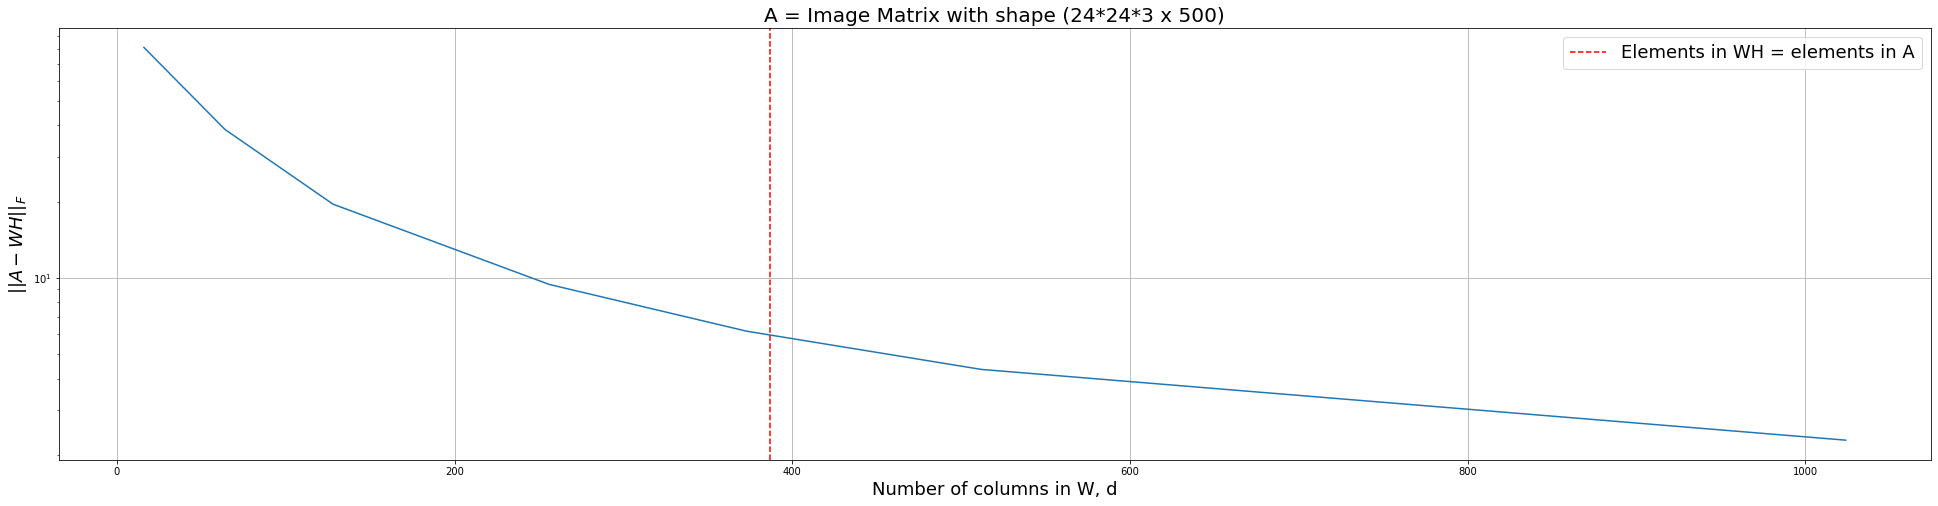

In [ ]:
def ex2f():
    maxIterations = 1000 
    dList = [16, 64, 128, 256, 373, 512, 1024]
    normList = np.zeros(len(dList))
    for i in range(len(dList)):
        W, H, opacityMatrix, norm = NMFImages(faces, dList[i], maxIterations)
        normList[i] = norm[-1]

    plt.figure(figsize=(13, 6)) 
    plt.axes([0, 0, 2, 1])
    plt.plot(dList, normList) 
    plt.title(f'A = Image Matrix with shape (24*24*3 x 500)', fontsize = 20)
    plt.xlabel('Number of columns in W, d', fontsize = 18)
    plt.ylabel(r'$||A - W H||_F$', fontsize = 18)
    plt.axvline(x = 387, label = 'Elements in WH = elements in A', color = 'r', linestyle = '--')
    plt.legend(fontsize = 18)
    plt.semilogy()
    plt.grid()
    plt.show()
ex2f()

Above is a plot showing the final value of the norm for varying values of $d$. The computations are done with the total number of iterations set to $1000$, for $d=\{16, 64, 128, 256, 373, 512, 1024\}$. $d=373$ is included since it is the rank of the image matrix, and it is of interest to examine whether the norm converges to a smaller value if $d$ is chosen larger than the rank, or if the $d$=rank indeed yields a best possible approximation. It is expected that, in general, larger $d$ corresponds to smaller norm, however at some point it is expected that the norm converges to the same value even if $d$ is increased, as there is a limit to how precise a reconstruction the NMF might yield (this limit could be a perfect reconstruction, but that is not the case here). One must also take into consideration the fact that for larger $d$, more iterations might be required before the norm converges. Hence, the algorithm might not converge within the set number of iterations for larger $d$, and the plot might not show a true representation of which $d$ yields the most precise approximation. 

In the plot, the value of $d$ which corresponds to the number of elements in $W$ and $H$ equalling the number of elements in the orignal image matrix is marked with a vertical line. Increasing $d$ further than this  value is meaningless if the sole purpose is to reduce the size of the dataset. This value is found by solving the equation

$$
\# \text{elements in W and H} = \# \text{elements in original image matrix}
$$
$$
\Rightarrow d \cdot 24 \cdot 24 \cdot 3 + 500 \cdot d = 24 \cdot 24 \cdot 3 \cdot 500,
$$

and is equal to $387$ (after rounding down). 

The plot confirms that the higher the rank of the approximations, the more precise are the reconstructions. Even when $d$ is increased beyond the original matrix rank of $373$, the norm converges to a significantly smaller value. Examining the point at which the size of the reconstructed dataset equals the size of the original dataset, we see that the norm converges to a value of around 6 for this $d$. In other words, even by reconstructing the images to a dataset of equal size to the orignal one, the NMF is not capable of a perfect reconstruction. This all but confirms the limitations the non-negativity constraint imposes on the reconstructions. If the purpose is to obtain a compressed dataset, one must accept a norm of at least 6.

The graph decreases at a higher rate for smaller values of $d$, whiler for larger $d$ it flats out. This means that for smaller rank approximations, the cost/benefit ratio of further increasing $d$ is smaller, i.e. the improvement of the reconstruction is relatively greater compared to the increase in runtime and datasize for smaller $d$ than for larger $d$. Hence, for larger $d$, it is increasingly more important to carefully examine whether further increasing the rank is indeed beneficial. This is even more important when noise is added to the equation, which it will be throughout the rest of the project.

## Task 3

In the following section static noise is added to the images. The greatest consequence of adding the static noise is that previously equal features - the 3D glasses, the cigar, the single earring - now look different. This has the consequence that a better NMF, being an NMF with higher rank, will learn the noise. This means that a better reconstruction actually will shift a reconstruction away from its original state (without the noise). This phenomenom os called overfitting, and is crucial concept in this section. 

The NMF used in this section can remove noise without knowledge of the original unpolluted dataset, so the method is unsupervised. However, because we have access to the original dataset, the norm of the difference between the denoised dataset and the original dataset will be calculated in order to analyse what NMF rank-values yield the best denoising. 

To mimic the effects of random processes that occur in nature, we have applied a model called $\textit{Additive Gaussian noise.}$ This model accurately reflects many systems and is a simple model to handle mathematically. We have applied the model in the following way:
$$ 
A_{noisy} = A + \sigma E 
$$    
where $\sigma$ is a positive scalar which represents the noise level and E is a matrix with the excact same shape as the original matrix A. It is called Gaussian noise because the components of the matrix $E$ are realizations of the standard normal distrubution. Furthermore we have made some assumptions to avoid certain difficulties. We only added noise on the colour channels that are non-zero for each respective pixel. We also clipped the values of each pixel to hold a value between 0 and 1, to make sure that the noisy images are plottable images.

For all plots and subtasks in task 3, we are using $\sigma = 0.10$ and 
$N$(Number of images) $ = 500$.

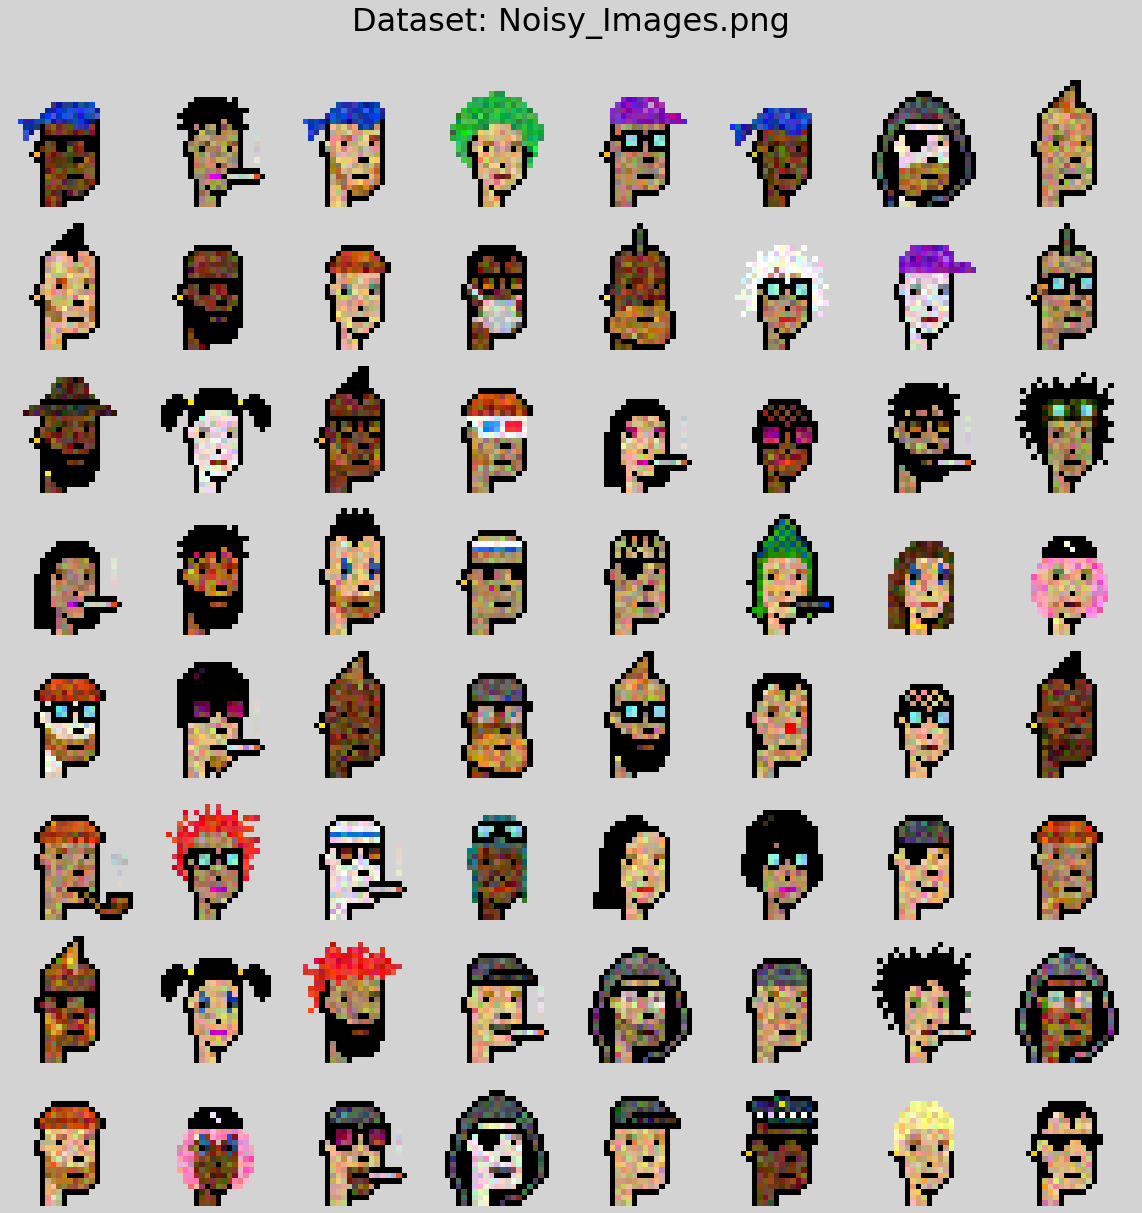

||A - A_noisy||_F for 500 images =  41.711047061456455


In [ ]:
def add_noise(imgs_reshaped):
    """
        Adds gaussian noise to images as described in text.
        Note that imgs must be given as a (24*24*3, N) numpy array, i.e the reshaped images
    Input:
            imgs_reshaped: (1728,N) numpy array
            sigma: scalar, noise level
    Output:
            noisy_faces: (1728,N) numpy array containing noisy images
    """
    # Noise level
    sigma = 0.10

    # Array that will store the rgb channels of the noisy images
    noisy_faces = np.copy(imgs_reshaped)

    # Number of noisy values we need
    nnzero = imgs_reshaped[np.nonzero(imgs_reshaped)].shape[0]

    # Sample noisy values and add noise
    noise = np.random.normal(0.0,1,nnzero)
    noisy_faces[np.nonzero(imgs_reshaped)] += sigma*noise
    
    # Clip to lie between 0 and 1 so that we can still interpret them as images
    noisy_faces = np.maximum(0.0,np.minimum(1.0, noisy_faces))      

    return noisy_faces

""" Global variables for task 3 """
opacityMatrix = faces[:,:, 3, :]         # Stores the opacity channel in 24 x 24 x N array
imagesWithoutAlpha = faces[:,:,:3, :]    # Removes alpha from the images
imagesWithoutAlphaReshaped = np.reshape(imagesWithoutAlpha, (np.prod(imagesWithoutAlpha.shape)//N, N))
noisyFaces = add_noise(imagesWithoutAlpha)

""" Reconstructing noise images with opacity """

noiseWithOpacity = np.zeros(faces.shape)
noiseWithOpacity[:,:,:3,:] = noisyFaces.reshape(imagesWithoutAlpha.shape)
noiseWithOpacity[:,:,3,:] = opacityMatrix

def ex3a():

    plotimgs(noiseWithOpacity, d = None, nplot = 8, filename="Noisy_Images.png")
    noisyFacesReshaped = np.reshape(noisyFaces, (np.prod(noisyFaces.shape)//N, N))
    
    noiseResidual = np.linalg.norm(imagesWithoutAlphaReshaped - noisyFacesReshaped, ord = 'fro') # Calculate frobenius norm
    print('||A - A_noisy||_F for 500 images = ',noiseResidual)
    return noiseResidual
    
noiseResidual = ex3a()

In the above plot we see a representation of the images containing noise. The noise is represented in the plot as random pixels in the faces which are given random amounts of noise, corresponding to random colours, polluting the skin colour and appearance of separate features in the faces.

Examining the norm of the difference between the matrix containing the noisy images and the matrix containing the original images, $||A_{noisy} - A||_F $, equal to $41.7$, it is obvious that there is indeed a difference between the noisy images and the original images, also mathematically. Nevertheless, the norm is not neccessarily the best way to describe difference between images from a human standpoint. For example, two face images with a minor difference in the colour of the skin can have a major difference in norm, but two face images where the eyes are completley different can have a small difference in norm. The norm will not necessarily reflect what we humans consider similar, but it will reflect wether or not the values of the pixels are close or far off. This must be taken into consideration when computing and interpreting the value of the norm in denoising processes.

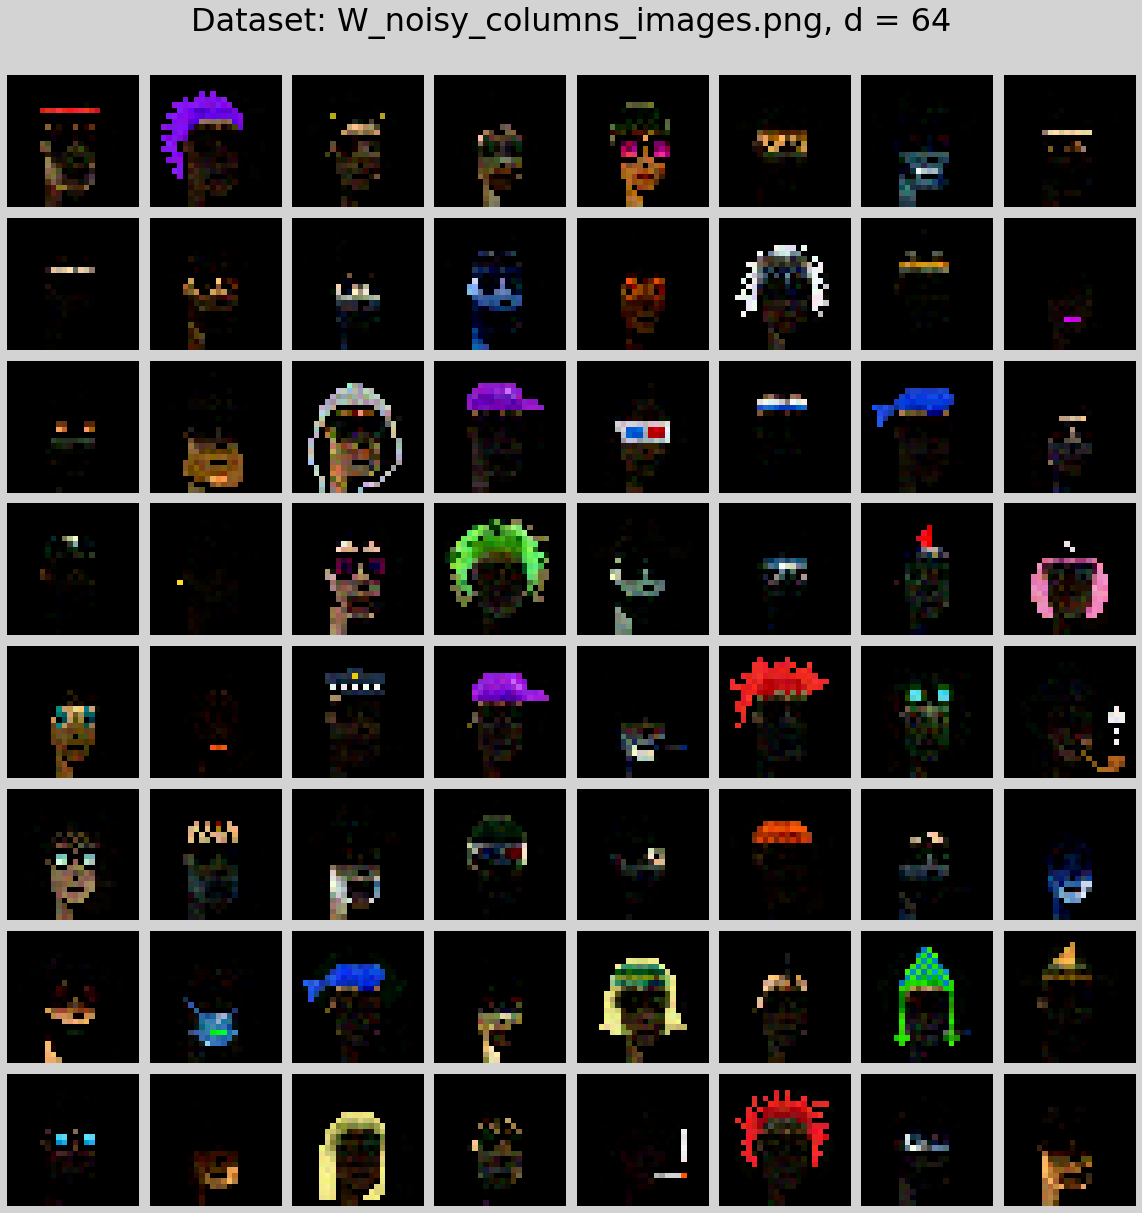

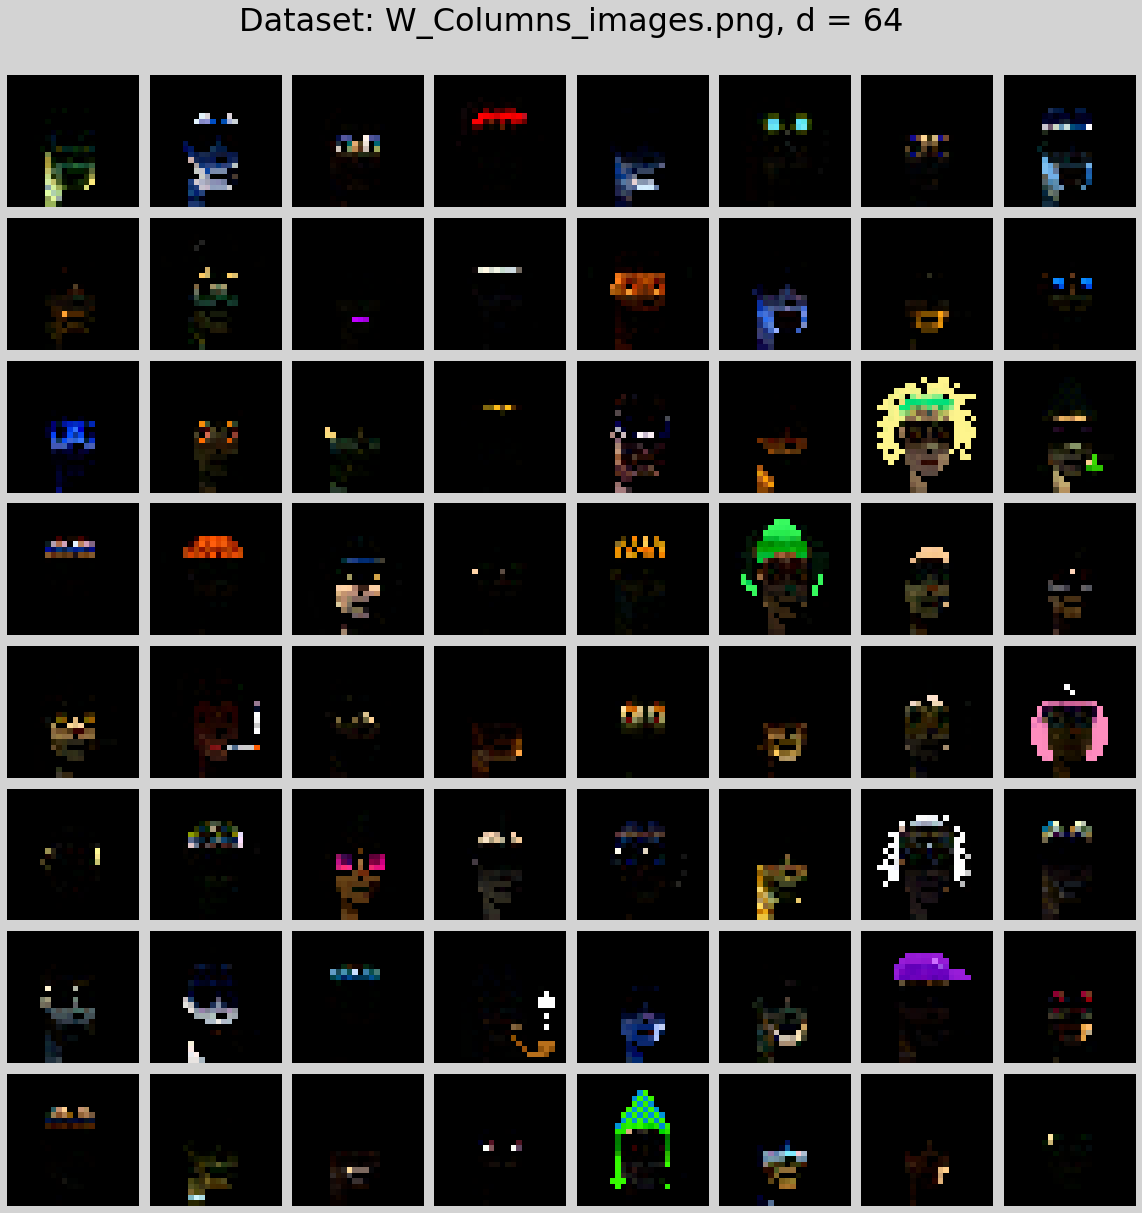

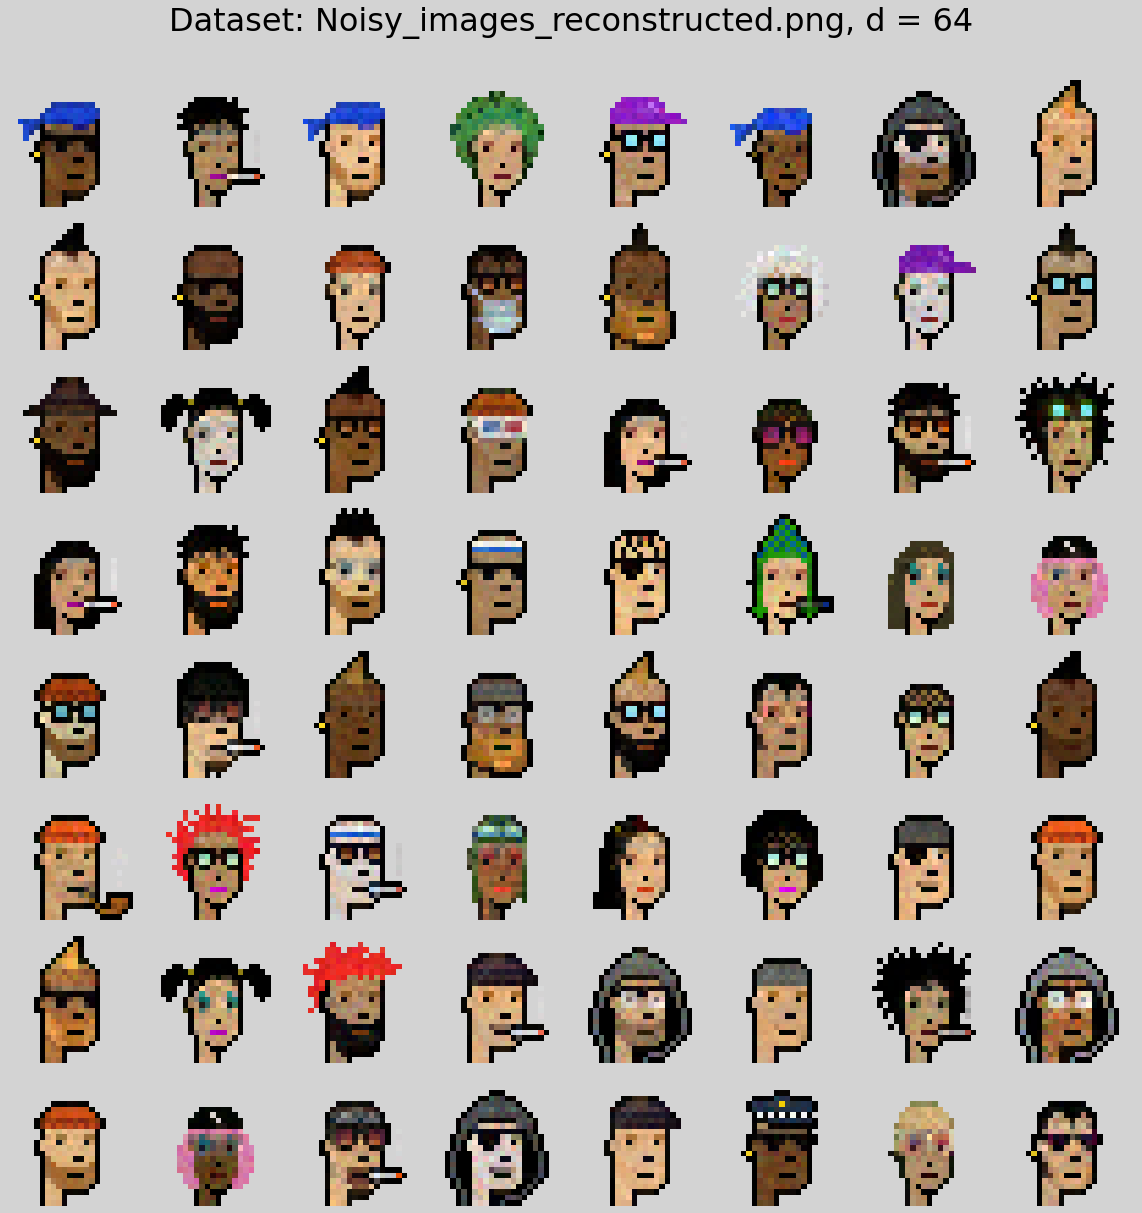

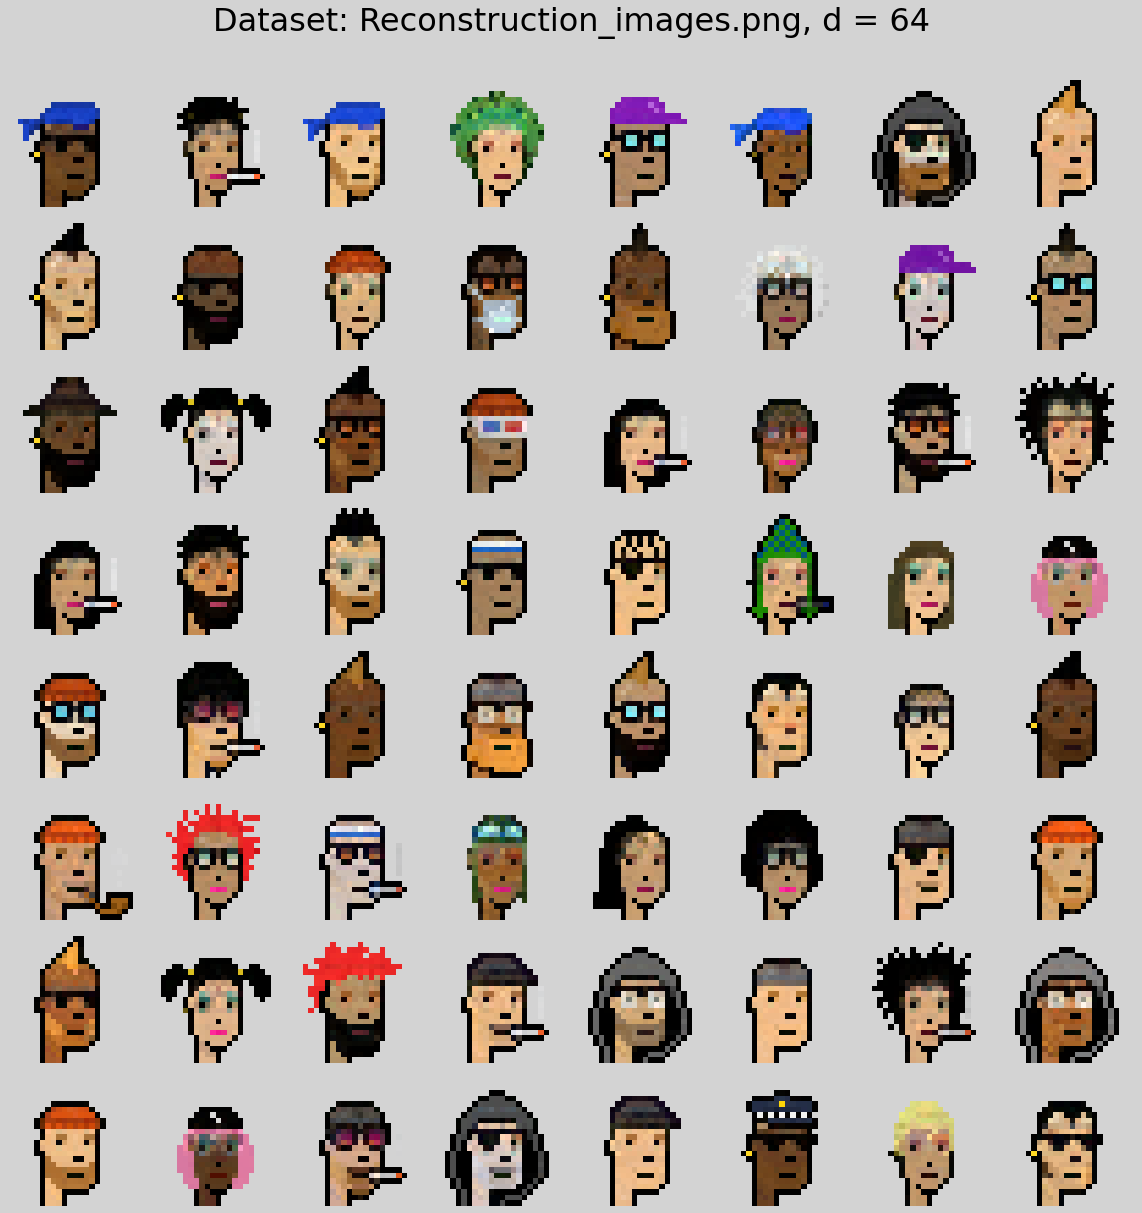

||A - A_noisyRecon ||_F for 500 images =  42.699617815418755
||A - A_Recon ||_F for 500 images =  38.876361390036934


In [ ]:
def ex3b():
    d = 64
    Wnoisy, Hnoisy, opacityMatrix, norm = NMFImages(noiseWithOpacity, d, maxIterations)
    
    WnoisyReshaped = np.reshape(Wnoisy,(24,24,3,d))

    plotimgs(WnoisyReshaped, d, 8, filename="W_noisy_columns_images.png")
    plotimgs(W_reshaped, d, 8, filename="W_Columns_images.png")

    """ Reconstruction, "denoised" images """
    facesNoiseRGB = noisyFaces[:,:,:3,:] # Lagrer rgb verdiene til rekonstruering

    reconstructionNoise = Wnoisy @ Hnoisy # (1728,500)
    
    denoiseWithOpacity = np.zeros(faces.shape)
    denoiseWithOpacity[:,:,:3,:] = reconstructionNoise.reshape(facesNoiseRGB.shape)
    denoiseWithOpacity[:,:,3,:] = opacityMatrix
    
    plotimgs(denoiseWithOpacity, d, 8, filename="Noisy_images_reconstructed.png")
    plotimgs(facesWithOpacity, d, 8, filename="Reconstruction_images.png")
    
    noiseReconResidual = np.linalg.norm(imagesWithoutAlphaReshaped - reconstructionNoise, ord = 'fro') # Calculates frobenius norm
    reconImages = facesWithOpacity[:,:,:3,:]
    reconImages = np.reshape(reconImages, (np.prod(reconImages.shape)//N, N))

    reconstructionResidual = np.linalg.norm(imagesWithoutAlphaReshaped - reconImages, ord = 'fro')

    print('||A - A_noisyRecon ||_F for 500 images = ',noiseReconResidual)
    print('||A - A_Recon ||_F for 500 images = ', reconstructionResidual)

ex3b()

The above plots show the reconstructions of the noisy images and the columns of $W$ interpreted as images. 

The reconstruction of the noisy images $WH_{\text{noisy}}$ is less noisy than the original noisy images, i.e. noise is removed when the NMF is applied on the polluted dataset with $d=64$. With $d=64$, $W$ consists of 64 columns which results in the NMF not learning that many features. The effect of this is that some of the noise is being overlooked and not saved in $W$. For larger values of $d$, $W$ contains a higher number of columns and therefore would have more space to save data, both features and noise. So for higher values of $d$ the reconstruction of the noisy images would contain more noise. By comparing the reconstructed images $WH$ for the noisy dataset and the original, unpolluted images we notice they are almost identical, which confirms how applying the $NMF$  with $d=64$ removes almost all the noise. However, the norm of the difference from the original images for both reconstructions are quite similar, they only differ with a value of about $3.8$. This is likely a result of the fact that the Frobenius norm does not take into consideration what is "similar" from a human point of view.

In the plot that represents the columns in $W$ interpreted as images, we observe as in task 2 that each column in $W$ contains some key feature of the original image. By comparing the columns of $W$ from task 2 and $W_{\text{noisy}}$ interpreted as images it looks like the noise has minimal effect on $W_{\text{noisy}}$. For most of the images, it seems as $W_{\text{noisy}}$ detects the same features as $W$, with the exception of a few images where $W_{\text{noisy}}$ clearly detects noise instead of a feature. This all indicates that executing NMF for d = 64 stores more actual features of the images, rather than the noise that the images contain. As the noise is spread arbitrarily across the dataset, "on top of" the original images, it is as expected that the NMF does not recognize it as important features of the dataset, thus not storing it in the columns of $W$.



"Best fit" value of d =  1024
 "Best fit" value of d for noise reconstruction =  128


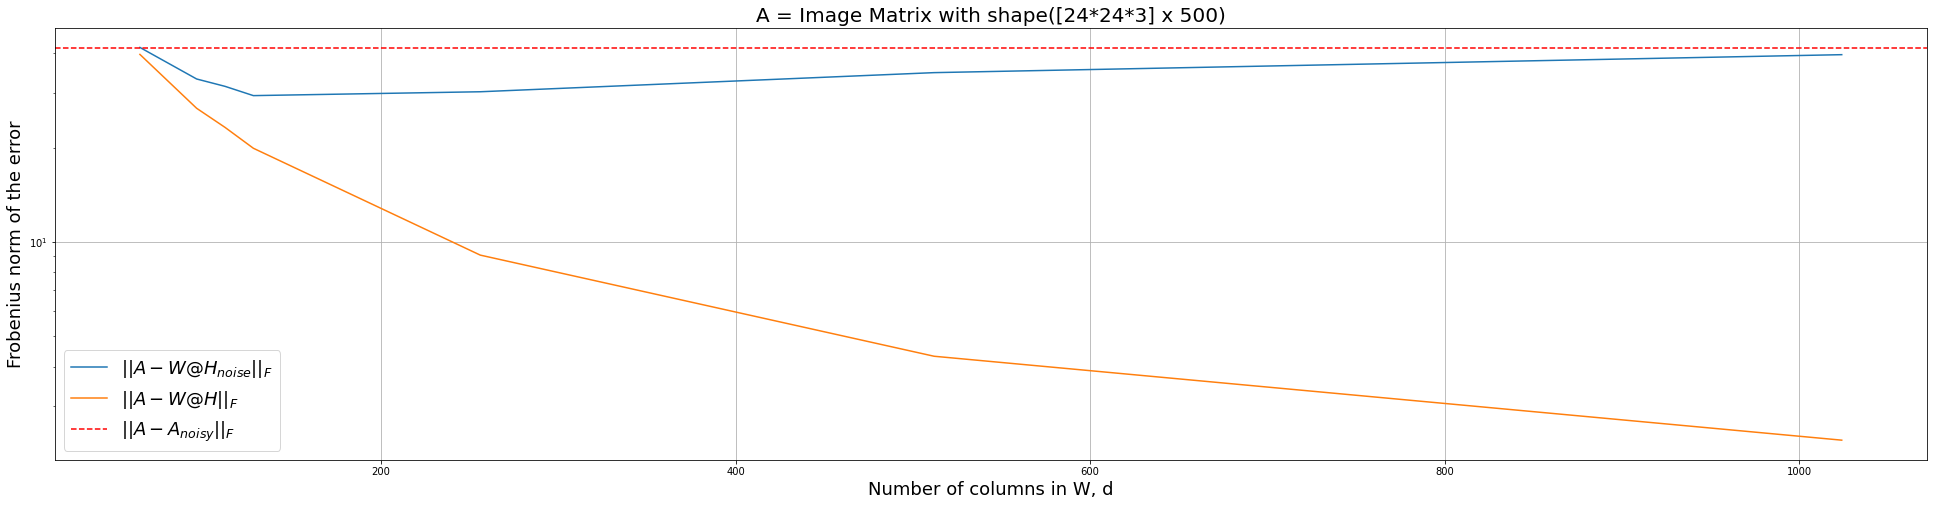

In [ ]:
def ex3c():
    dList = [64, 96, 112, 128, 256, 512, 1024]
    normListNoise = np.zeros(len(dList))
    normList = np.zeros(len(dList))

    for i in range(len(dList)):
        Wnoisy, Hnoisy, opacityMatrixNoisy, normNoisy = NMFImages(noiseWithOpacity, dList[i], maxIterations)
        reconNoiseReshaped = np.reshape(Wnoisy @ Hnoisy, (np.prod((Wnoisy @ Hnoisy).shape)//N, N))
        normListNoise[i] = np.linalg.norm(imagesWithoutAlphaReshaped - reconNoiseReshaped, 'fro') #Faces64 is images without noise
        
        W, H, opacityMatrix, norm = NMFImages(faces, dList[i], maxIterations)
        normList[i] = norm[-1] # Siste elementet i norm listen som er feilen ved siste iterasjon
    
    minIdx = int(np.argwhere(normList == np.min(normList)))
    minNormD = dList[minIdx]
    print('"Best fit" value of d = ', minNormD)

    minIdxNoise = int(np.argwhere(normListNoise == np.min(normListNoise)))
    minNormDnoise = dList[minIdxNoise]
    print(' "Best fit" value of d for noise reconstruction = ' , minNormDnoise)

    plt.figure(figsize=(13, 6))
    plt.axes([0, 0, 2, 1])
    plt.plot(dList, normListNoise, label = r'$||A - W@H_{noise}||_F$') 
    plt.plot(dList, normList, label = r'$||A - W@H||_F$')
    plt.axhline(y = noiseResidual, color='r', linestyle='--', label = r'$||A - A_{noisy}||_F$')

    plt.legend(fontsize = 18)
    plt.title(f'A = Image Matrix with shape([24*24*3] x 500)', fontsize = 20)
    plt.xlabel('Number of columns in W, d', fontsize = 18)
    plt.ylabel('Frobenius norm of the error', fontsize = 18)
    plt.semilogy()
    plt.grid()
    plt.show()
ex3c()

Above is a plot showing the reconstruction error for the noisy images and the orginal images respectively, after conducting the NMF algorithm for ranks $d=\{64, 96, 112, 128, 256, 512, 1024\}$. 

It appears from the plot that the reconstruction error for the noisy images as a function of $d$ yields a "U" -like shape, while the reconstruction error of the original images as a function of $d$ yields an "L" -like shape. The reconstruction error for the noisy images reaches a point of minimal value at approximately $d = 128$, which is the "best fit" and provides the lowest reconstruction error. In other words, this choice of $d$ provides the optimal balance between learning more of the features of the original images, while at the same time avoiding learning too much of the noise. This rank corresponds to a reconstructed dataset 33% the size of the original, meaning the NMF has reduced the size of the data considerably while at the same time removing noise from the dataset. 

As the value of $d$ is smaller, i.e. less than $128$, we observe underfitting. Our algorithm may manage to not capture too much noise, but it is unable to capture the complexity of the data beacuse there simply is not enough columns in $W$ to do so. For larger values of $d$ ($d > 128$) we observe the phenomena called overfitting. Our algorithm learns more noise aswell as more features, instead of just fitting the features. $W$ will be able to store more data, and thus store more of the noise. The more noise the reconstructed images contain, the more they differ from the original images. This is reflected by the plot in that the reconstruction error increases slowly, but surely. As $d$ increases the reconstruction error will converge towards the dotted line, and eventually tangent it. This dotted line represents the difference between the original images and the same images containg (all) the added noise. After the reconstruction error has reached its minimum, this dotted line can be interpreted as a kind of upper limit for the error. For large values of $d$ the NMF algorithm will learn almost all the noise, but it cannot learn more noise than what is orignally added to the images. So as long as the algorithm learns essentially all the "features" of the images for larger values ​​of $d$, then this horizontal, dotted line can be interpreted as an upper limit on how large the value of the reconstruction error can ever be (disregard the smaller $d$). However, due to non-negative constraint, the NMF algorithm will not always be able to make perfect reconstructions of the images, no matter the value of $d$. Therefore it is not entirely correct to call it an upper limit, but in our situation this size sort of acts as an upper limit for the reconstruction error.

As discussed earlier we notice an "L"-like shape when the reconstruction error of the original, unpolluted images is plotted as a function of $d$. For small values of $d$ the graph decreases rapidly, and for large values of $d$ the graph flattens out. This a consequence of the fact that there exists a limit to how presice a NMF reconstruction can be. At some point the reconstruction error converges to the same value even if $d$ is increased further.

### Conclusion

Data manipulation provide different ways of interpreting datasets. This project has examined the Lee and Seung's multiplicative update mehtod for non-negative matrix factorization, and the method has been applied on the Cryptopunk dataset. In a broad scheme of things our result can be devided into three comprehensive measures: $\textbf{I)}$ the compression of datasets using NMF, $\textbf{II)}$ the ability of the NMF-method to extract underlying features in a dataset, and $\textbf{III)}$ the ability of the NMF-method to remove noise and irregularities from a dataset.

The consistent/general trend of the NMF-method for decomposing the Cryptopunk dataset is that higher rank approximations yield reconstructions that are more representative of the original dataset, with respect to the Frobenius norm. However, perfect reconstructions were not obtained, even when the resulting dataset was larger than the original - which is likely a result of the limitations of the method due to the non-negativity requirement. We observed the methods ability to extract underlying features of the dataset, and for increasing rank, higher detailed features decompositions were learned, yielding more representative reconstructions. However, as a result of the method being purely mathematical, it does not care whether the features are interpretable from a physical point of view. This can be a disadvantage if the ambition of the NMF is to extract the constituating features, however, this may not always be the case. 

For the polluted dataset containing noise, we found that NMF can be a tool for removing noise and irregularities. When denoising the images, the different rank approximations yield varying quaility reconstructions. For lower rank approximations, the method learns too few features, hence producing a bad reconstruction, i.e. underfitting, however, for higher rank approximations, learning more features means learning more noise, resulting in a bad reconstruction, i.e. overfitting. By comparing the reconstructions of the polluted dataset with the original, unpolluted, dataset, using the Frobenius norm, a minima - a rank that minimises underfitting and overfitting - can be determined. The rank of the reconstruction that produces this minima is the rank of the NMF that produces the best possible reconstruction for the NMF compared with an unpolluted image, however, in order to find this minima, knowledge of the unpolluted dataset is necessary, meaning that optimal results really can only be obtained by a supervised implementation, which can be a constraint for the method. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ef5e390-8b2f-4899-9a1e-a699c66a5da5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>